In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import file

In [ ]:
df = pd.read_csv('/content/pollution.csv')
df

country           state       city                              station  \
0      India  Andhra_Pradesh  Amaravati       Secretariat, Amaravati - APPCB   
1      India  Andhra_Pradesh   Chittoor  Gangineni Cheruvu, Chittoor - APPCB   
2      India  Andhra_Pradesh   Chittoor  Gangineni Cheruvu, Chittoor - APPCB   
3      India  Andhra_Pradesh     Kadapa      Yerramukkapalli, Kadapa - APPCB   
4      India  Andhra_Pradesh   Tirupati           Tirumala, Tirupati - APPCB   
...      ...             ...        ...                                  ...   
3263   India     West_Bengal    Kolkata    Rabindra Sarobar, Kolkata - WBPCB   
3264   India     West_Bengal    Kolkata            Victoria, Kolkata - WBPCB   
3265   India     West_Bengal   Siliguri   Ward-32 Bapupara, Siliguri - WBPCB   
3266   India     West_Bengal   Siliguri   Ward-32 Bapupara, Siliguri - WBPCB   
3267   India     West_Bengal   Siliguri   Ward-32 Bapupara, Siliguri - WBPCB   

              last_update   latitude  longitude pollutant_id  pollutant_min  \
0     15-04-2024 22:00:00  16.515083  80.518167           CO           12.0   
1     15-04-2024 22:00:00  13.204880  79.097889          NH3            1.0   
2     15-04-2024 22:00:00  13.204880  79.097889           CO            1.0   
3     15-04-2024 22:00:00  14.465052  78.824187           CO            NaN   
4     15-04-2024 22:00:00  13.670000  79.350000        PM2.5           12.0   
...                   ...        ...        ...          ...            ...   
3263  15-04-2024 22:00:00  22.511060  88.351420           CO           24.0   
3264  15-04-2024 22:00:00  22.544808  88.340369          SO2           12.0   
3265  15-04-2024 22:00:00  26.687923  88.415250         PM10           44.0   
3266  15-04-2024 22:00:00  26.687923  88.415250          NH3            4.0   
3267  15-04-2024 22:00:00  26.687923  88.415250           CO           22.0   

      pollutant_max  pollutant_avg  
0              46.0           24.0  
1               3.0            1.0  
2              22.0            2.0  
3               NaN            NaN  
4              93.0           38.0  
...             ...            ...  
3263           30.0           27.0  
3264           37.0           20.0  
3265          124.0           73.0  
3266           14.0            9.0  
3267           64.0           38.0  

[3268 rows x 11 columns]

In [ ]:
df.describe()

latitude    longitude  pollutant_min  pollutant_max  pollutant_avg
count  3268.000000  3268.000000    2952.000000    2952.000000    2952.000000
mean     22.817541    78.480811      24.606369      84.942073      49.490515
std       5.408020     4.743037      27.514382      91.888993      51.021015
min       8.514909    70.909168       1.000000       1.000000       1.000000
25%      19.089328    75.623328       5.000000      20.000000      13.000000
50%      23.331731    77.296291      15.000000      57.000000      34.000000
75%      27.237110    80.264200      34.000000     111.000000      68.000000
max      31.620000    94.636574     198.000000     500.000000     338.000000

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        3268 non-null   object 
 1   state          3268 non-null   object 
 2   city           3268 non-null   object 
 3   station        3268 non-null   object 
 4   last_update    3268 non-null   object 
 5   latitude       3268 non-null   float64
 6   longitude      3268 non-null   float64
 7   pollutant_id   3268 non-null   object 
 8   pollutant_min  2952 non-null   float64
 9   pollutant_max  2952 non-null   float64
 10  pollutant_avg  2952 non-null   float64
dtypes: float64(5), object(6)
memory usage: 281.0+ KB
None


Rows with NULL values

In [ ]:
df[df['pollutant_min'].isnull()]

country           state        city  \
3      India  Andhra_Pradesh      Kadapa   
5      India  Andhra_Pradesh    Tirupati   
7      India  Andhra_Pradesh  Vijayawada   
39     India           Bihar     Hajipur   
40     India           Bihar     Hajipur   
...      ...             ...         ...   
3184   India   Uttar_Pradesh        Agra   
3189   India   Uttar_Pradesh    Bareilly   
3219   India   Uttar_Pradesh   Moradabad   
3227   India   Uttar_Pradesh       Noida   
3234   India   Uttar_Pradesh   Prayagraj   

                                        station          last_update  \
3               Yerramukkapalli, Kadapa - APPCB  15-04-2024 22:00:00   
5               Vaikuntapuram, Tirupati - APPCB  15-04-2024 22:00:00   
7                 HB Colony, Vijayawada - APPCB  15-04-2024 22:00:00   
39             Industrial Area, Hajipur - BSPCB  15-04-2024 22:00:00   
40             Industrial Area, Hajipur - BSPCB  15-04-2024 22:00:00   
...                                         ...                  ...   
3184  Sector-3B Avas Vikas Colony, Agra - UPPCB  15-04-2024 22:00:00   
3189              Civil Lines, Bareilly - UPPCB  15-04-2024 22:00:00   
3219            Jigar Colony, Moradabad - UPPCB  15-04-2024 22:00:00   
3227                   Sector - 62, Noida - IMD  15-04-2024 22:00:00   
3234       Motilal Nehru NIT, Prayagraj - UPPCB  15-04-2024 22:00:00   

       latitude  longitude pollutant_id  pollutant_min  pollutant_max  \
3     14.465052  78.824187           CO            NaN            NaN   
5     13.615387  79.409230        PM2.5            NaN            NaN   
7     16.536107  80.594233          SO2            NaN            NaN   
39    25.697189  85.245900         PM10            NaN            NaN   
40    25.697189  85.245900          NH3            NaN            NaN   
...         ...        ...          ...            ...            ...   
3184  27.194120  77.962370         PM10            NaN            NaN   
3189  28.359581  79.414455          NH3            NaN            NaN   
3219  28.856664  78.772638         PM10            NaN            NaN   
3227  28.624548  77.357710           CO            NaN            NaN   
3234  25.494000  81.863000        PM2.5            NaN            NaN   

      pollutant_avg  
3               NaN  
5               NaN  
7               NaN  
39              NaN  
40              NaN  
...             ...  
3184            NaN  
3189            NaN  
3219            NaN  
3227            NaN  
3234            NaN  

[316 rows x 11 columns]

# Drop null values

In [ ]:
df.dropna(subset=['pollutant_min'], inplace=True)

In [ ]:
columns_to_drop = ['country','last_update', 'latitude', 'longitude']
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df

state       city                              station  \
0     Andhra_Pradesh  Amaravati       Secretariat, Amaravati - APPCB   
1     Andhra_Pradesh   Chittoor  Gangineni Cheruvu, Chittoor - APPCB   
2     Andhra_Pradesh   Chittoor  Gangineni Cheruvu, Chittoor - APPCB   
4     Andhra_Pradesh   Tirupati           Tirumala, Tirupati - APPCB   
6     Andhra_Pradesh   Tirupati      Vaikuntapuram, Tirupati - APPCB   
...              ...        ...                                  ...   
3263     West_Bengal    Kolkata    Rabindra Sarobar, Kolkata - WBPCB   
3264     West_Bengal    Kolkata            Victoria, Kolkata - WBPCB   
3265     West_Bengal   Siliguri   Ward-32 Bapupara, Siliguri - WBPCB   
3266     West_Bengal   Siliguri   Ward-32 Bapupara, Siliguri - WBPCB   
3267     West_Bengal   Siliguri   Ward-32 Bapupara, Siliguri - WBPCB   

     pollutant_id  pollutant_min  pollutant_max  pollutant_avg  
0              CO           12.0           46.0           24.0  
1             NH3            1.0            3.0            1.0  
2              CO            1.0           22.0            2.0  
4           PM2.5           12.0           93.0           38.0  
6              CO           10.0           16.0           12.0  
...           ...            ...            ...            ...  
3263           CO           24.0           30.0           27.0  
3264          SO2           12.0           37.0           20.0  
3265         PM10           44.0          124.0           73.0  
3266          NH3            4.0           14.0            9.0  
3267           CO           22.0           64.0           38.0  

[2952 rows x 7 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2952 entries, 0 to 3267
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          2952 non-null   object 
 1   city           2952 non-null   object 
 2   station        2952 non-null   object 
 3   pollutant_id   2952 non-null   object 
 4   pollutant_min  2952 non-null   float64
 5   pollutant_max  2952 non-null   float64
 6   pollutant_avg  2952 non-null   float64
dtypes: float64(3), object(4)
memory usage: 184.5+ KB


In [ ]:
df['pollutant_id'].unique()

array(['CO', 'NH3', 'PM2.5', 'OZONE', 'NO2', 'SO2', 'PM10'], dtype=object)

# Pivot table

In [ ]:
pivot_table = df.pivot_table(index=['state', 'city', 'pollutant_id'],
                             values=['pollutant_min', 'pollutant_max', 'pollutant_avg'],
                             aggfunc='mean')


print(pivot_table)


                                       pollutant_avg  pollutant_max  \
state          city      pollutant_id                                 
Andhra_Pradesh Amaravati CO                     24.0           46.0   
                         NH3                     4.0            4.0   
                         NO2                     8.0           14.0   
                         OZONE                  41.0           56.0   
                         PM10                   60.0          103.0   
...                                              ...            ...   
West_Bengal    Siliguri  NO2                    53.0          106.0   
                         OZONE                  35.0           63.0   
                         PM10                   73.0          124.0   
                         PM2.5                  59.0          108.0   
                         SO2                     8.0           11.0   

                                       pollutant_min  
state          city  

# Countplot of Data collected from every city

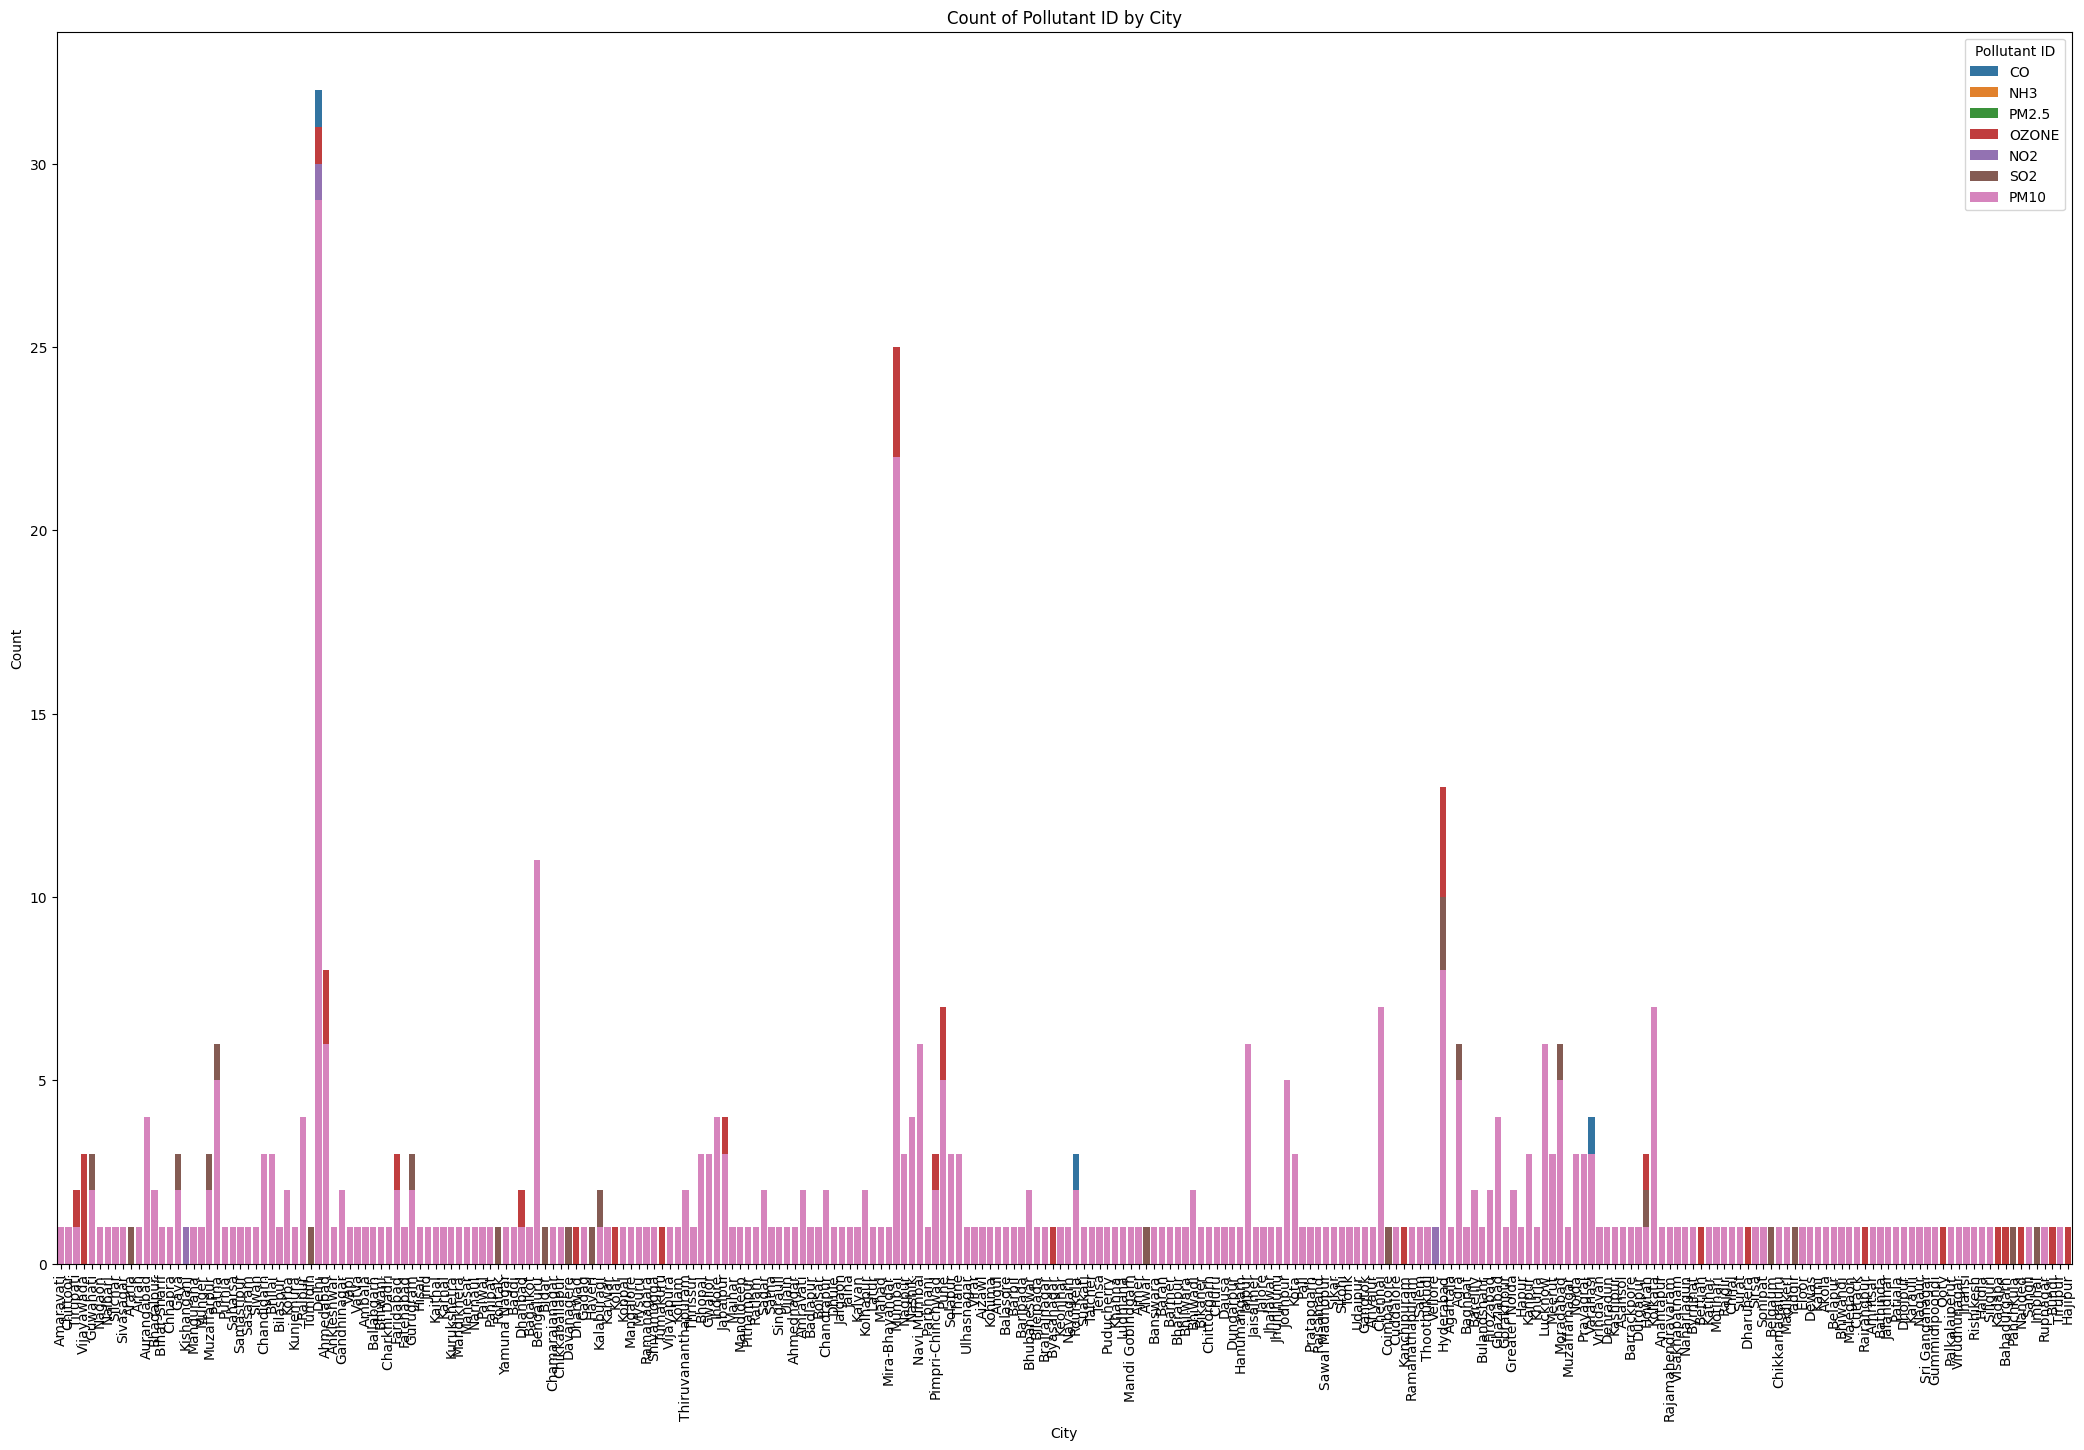

In [ ]:
plt.figure(figsize=(26, 16))
sns.countplot(x='city', data=df, hue='pollutant_id', dodge=False)
plt.title('Count of Pollutant ID by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Pollutant ID', loc='upper right')
plt.xticks(rotation=90)
plt.show()


# Pie chart plot for pollutants in city

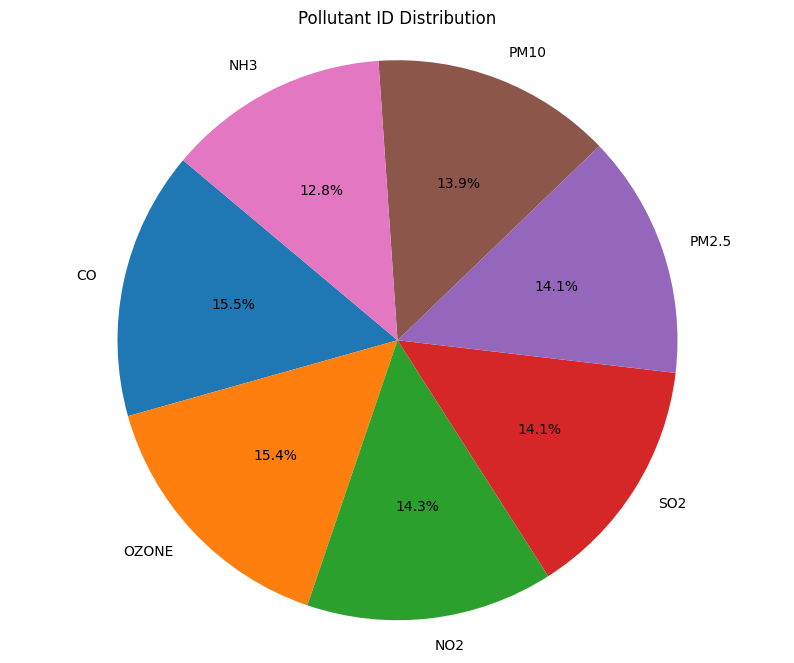

In [ ]:
# Count the occurrences of each pollutant_id
pollutant_counts = df['pollutant_id'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(pollutant_counts, labels=pollutant_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pollutant ID Distribution')
plt.show()


In [ ]:
# Group by city and count the occurrences of each pollutant ID
city_pollutant_count = df.groupby('city')['pollutant_id'].count().reset_index(name='count')

# Sort the cities based on the count of pollutant IDs
sorted_cities = city_pollutant_count.sort_values(by='count', ascending=False)

# Top 5 cities
top_5_cities = sorted_cities.head(5)

# Bottom 5 cities
bottom_5_cities = sorted_cities.tail(5)

print("Top 5 Cities by Count of Pollutant IDs:")
print(top_5_cities)

print("\nBottom 5 Cities by Count of Pollutant IDs:")
print(bottom_5_cities[::-1])


Top 5 Cities by Count of Pollutant IDs:
          city  count
77       Delhi    209
166     Mumbai    154
108  Hyderabad     72
37   Bengaluru     68
142    Kolkata     49

Bottom 5 Cities by Count of Pollutant IDs:
            city  count
123       Kadapa      1
127  Kanchipuram      2
199   Rairangpur      2
101      Hajipur      2
38       Bettiah      2


# Group by pollutant_id

In [ ]:
# Group by city and pollutant_id and calculate average values
avg_values = df.groupby(['city', 'pollutant_id']).agg({
    'pollutant_min': 'mean',
    'pollutant_max': 'mean',
    'pollutant_avg': 'mean'
}).reset_index()

# Sort the groups within each pollutant_id by average values in decreasing order
sorted_avg_values = avg_values.groupby('pollutant_id').apply(lambda x: x.sort_values(by=['pollutant_min', 'pollutant_max', 'pollutant_avg'], ascending=False))

# Drop the grouping index
sorted_avg_values.reset_index(drop=True, inplace=True)

print("Table of Cities for Each Pollutant ID in Decreasing Order of 'pollutant_min', 'pollutant_max', and 'pollutant_avg':")
print(sorted_avg_values)

Table of Cities for Each Pollutant ID in Decreasing Order of 'pollutant_min', 'pollutant_max', and 'pollutant_avg':
                city pollutant_id  pollutant_min  pollutant_max  pollutant_avg
0             Koppal           CO          115.0          120.0          119.0
1         Vijayapura           CO          102.0          102.0          102.0
2            Dhanbad           CO           77.5          131.5          106.0
3       Brajrajnagar           CO           72.0           94.0           77.0
4              Bidar           CO           67.0          101.0           83.0
...              ...          ...            ...            ...            ...
1644         Nalbari          SO2            1.0            5.0            3.0
1645        Parbhani          SO2            1.0            4.0            2.0
1646  Sri Ganganagar          SO2            1.0            3.0            2.0
1647       Dungarpur          SO2            1.0            2.0            2.0
1648           

In [ ]:
pivot_table_pollutant = sorted_avg_values.pivot_table(index='city', columns='pollutant_id')

# Reorder the levels of the columns
pivot_table_pollutant = pivot_table_pollutant.reorder_levels([1, 0], axis=1)

# Sort the columns by the first level (pollutant_id) in alphabetical order
pivot_table_pollutant = pivot_table_pollutant.sort_index(axis=1)

pivot_table_pollutant.dropna(inplace=True)

print(pivot_table_pollutant)

pollutant_id             CO                                       NH3  \
              pollutant_avg pollutant_max pollutant_min pollutant_avg   
city                                                                    
Agartala          62.000000     96.000000         26.00      3.000000   
Agra              17.833333     33.666667         11.50      4.666667   
Ahmedabad         42.125000     57.625000         19.75      5.600000   
Ahmednagar        43.000000    106.000000         28.00      4.000000   
Aizawl            24.000000     28.000000         19.00      2.000000   
...                     ...           ...           ...           ...   
Virar             29.000000    100.000000          8.00      7.000000   
Virudhunagar      28.000000     29.000000         26.00      6.000000   
Visakhapatnam     34.000000     81.000000          8.00      4.000000   
Vrindavan         36.000000     72.000000         31.00      1.000000   
Yamuna Nagar      74.000000    118.000000          

# Plots for Pollutant id

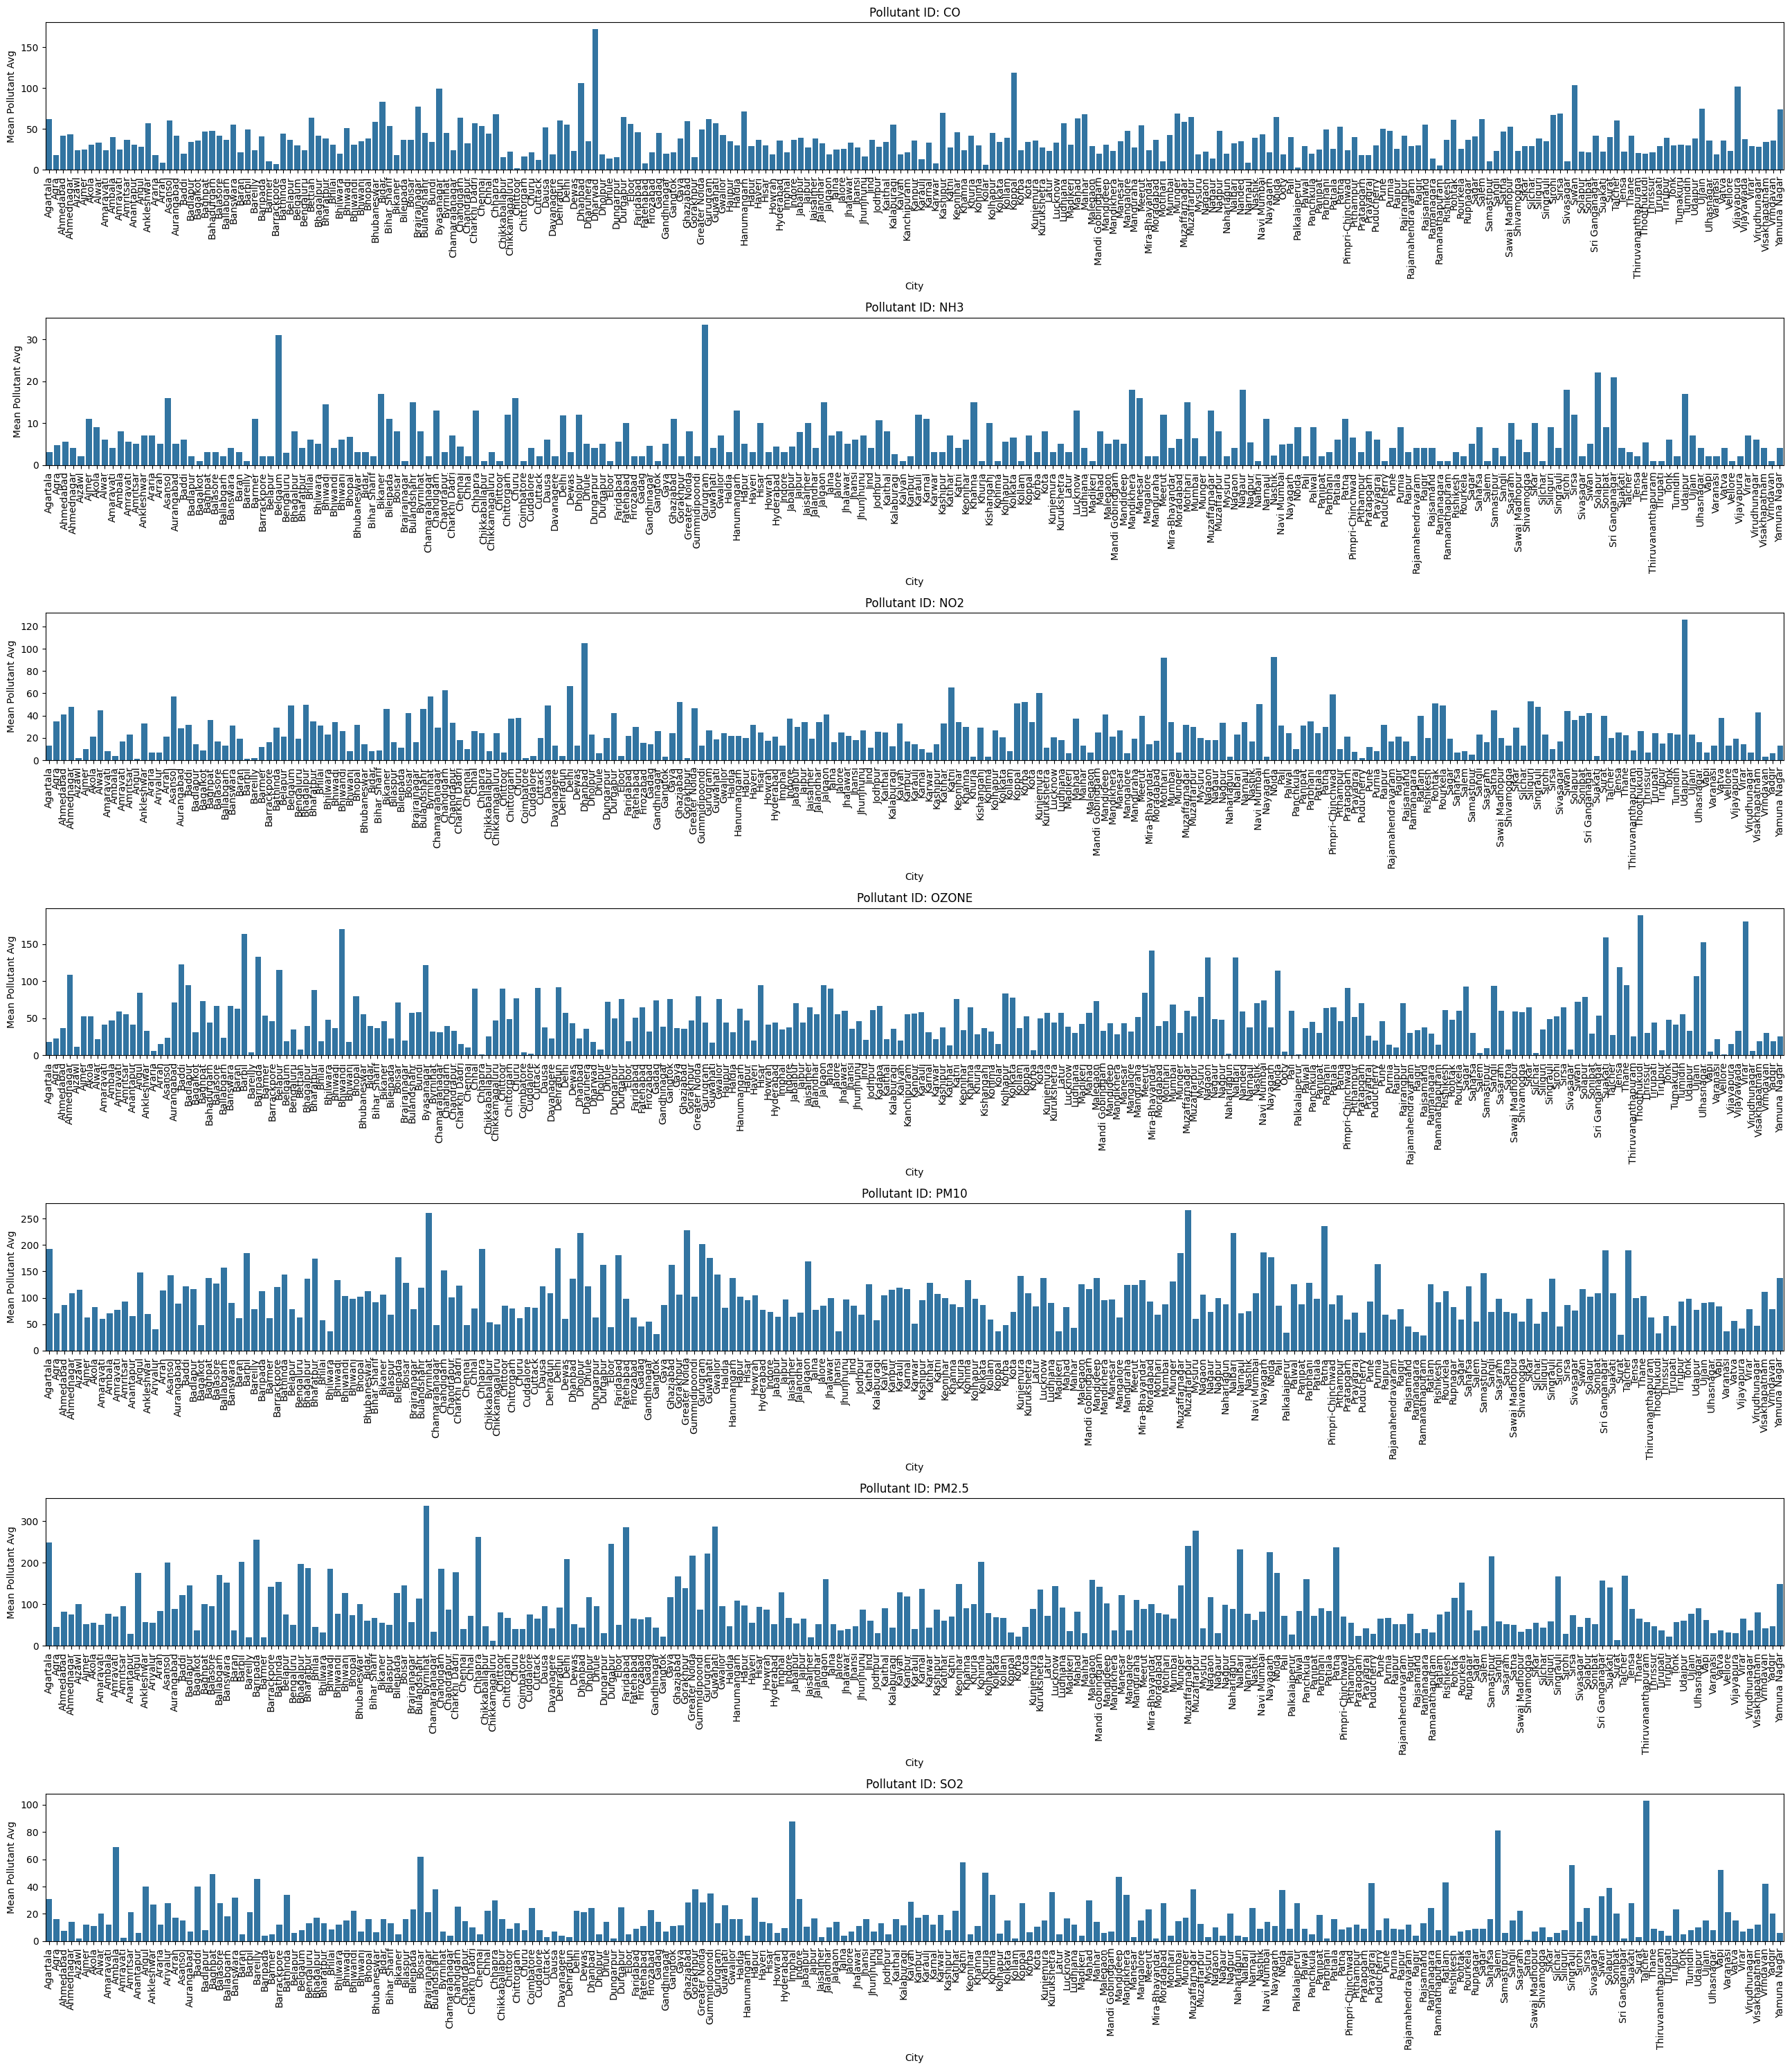

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(26, 30))

# Iterate over each pollutant_id
for i, pollutant_id in enumerate(sorted_avg_values['pollutant_id'].unique()):
    # Filter the DataFrame for the current pollutant_id
    data = sorted_avg_values[sorted_avg_values['pollutant_id'] == pollutant_id]

    # Calculate mean of pollutant_avg for each city
    data = data.groupby('city')['pollutant_avg'].mean().reset_index()

    # Plot the data
    plt.subplot(len(sorted_avg_values['pollutant_id'].unique()), 1, i+1)
    sns.barplot(x='city', y='pollutant_avg', data=data)
    plt.title(f'Pollutant ID: {pollutant_id}')
    plt.xlabel('City')
    plt.ylabel('Mean Pollutant Avg')
    plt.xticks(rotation=90)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


<ipython-input-34-b6a5be9ca4ff>:17: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x='city', y='pollutant_avg', data=data, color='blue', join=False)
<ipython-input-34-b6a5be9ca4ff>:17: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x='city', y='pollutant_avg', data=data, color='blue', join=False)
<ipython-input-34-b6a5be9ca4ff>:17: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x='city', y='pollutant_avg', data=data, color='blue', join=False)
<ipython-input-34-b6a5be9ca4ff>:17: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x='cit

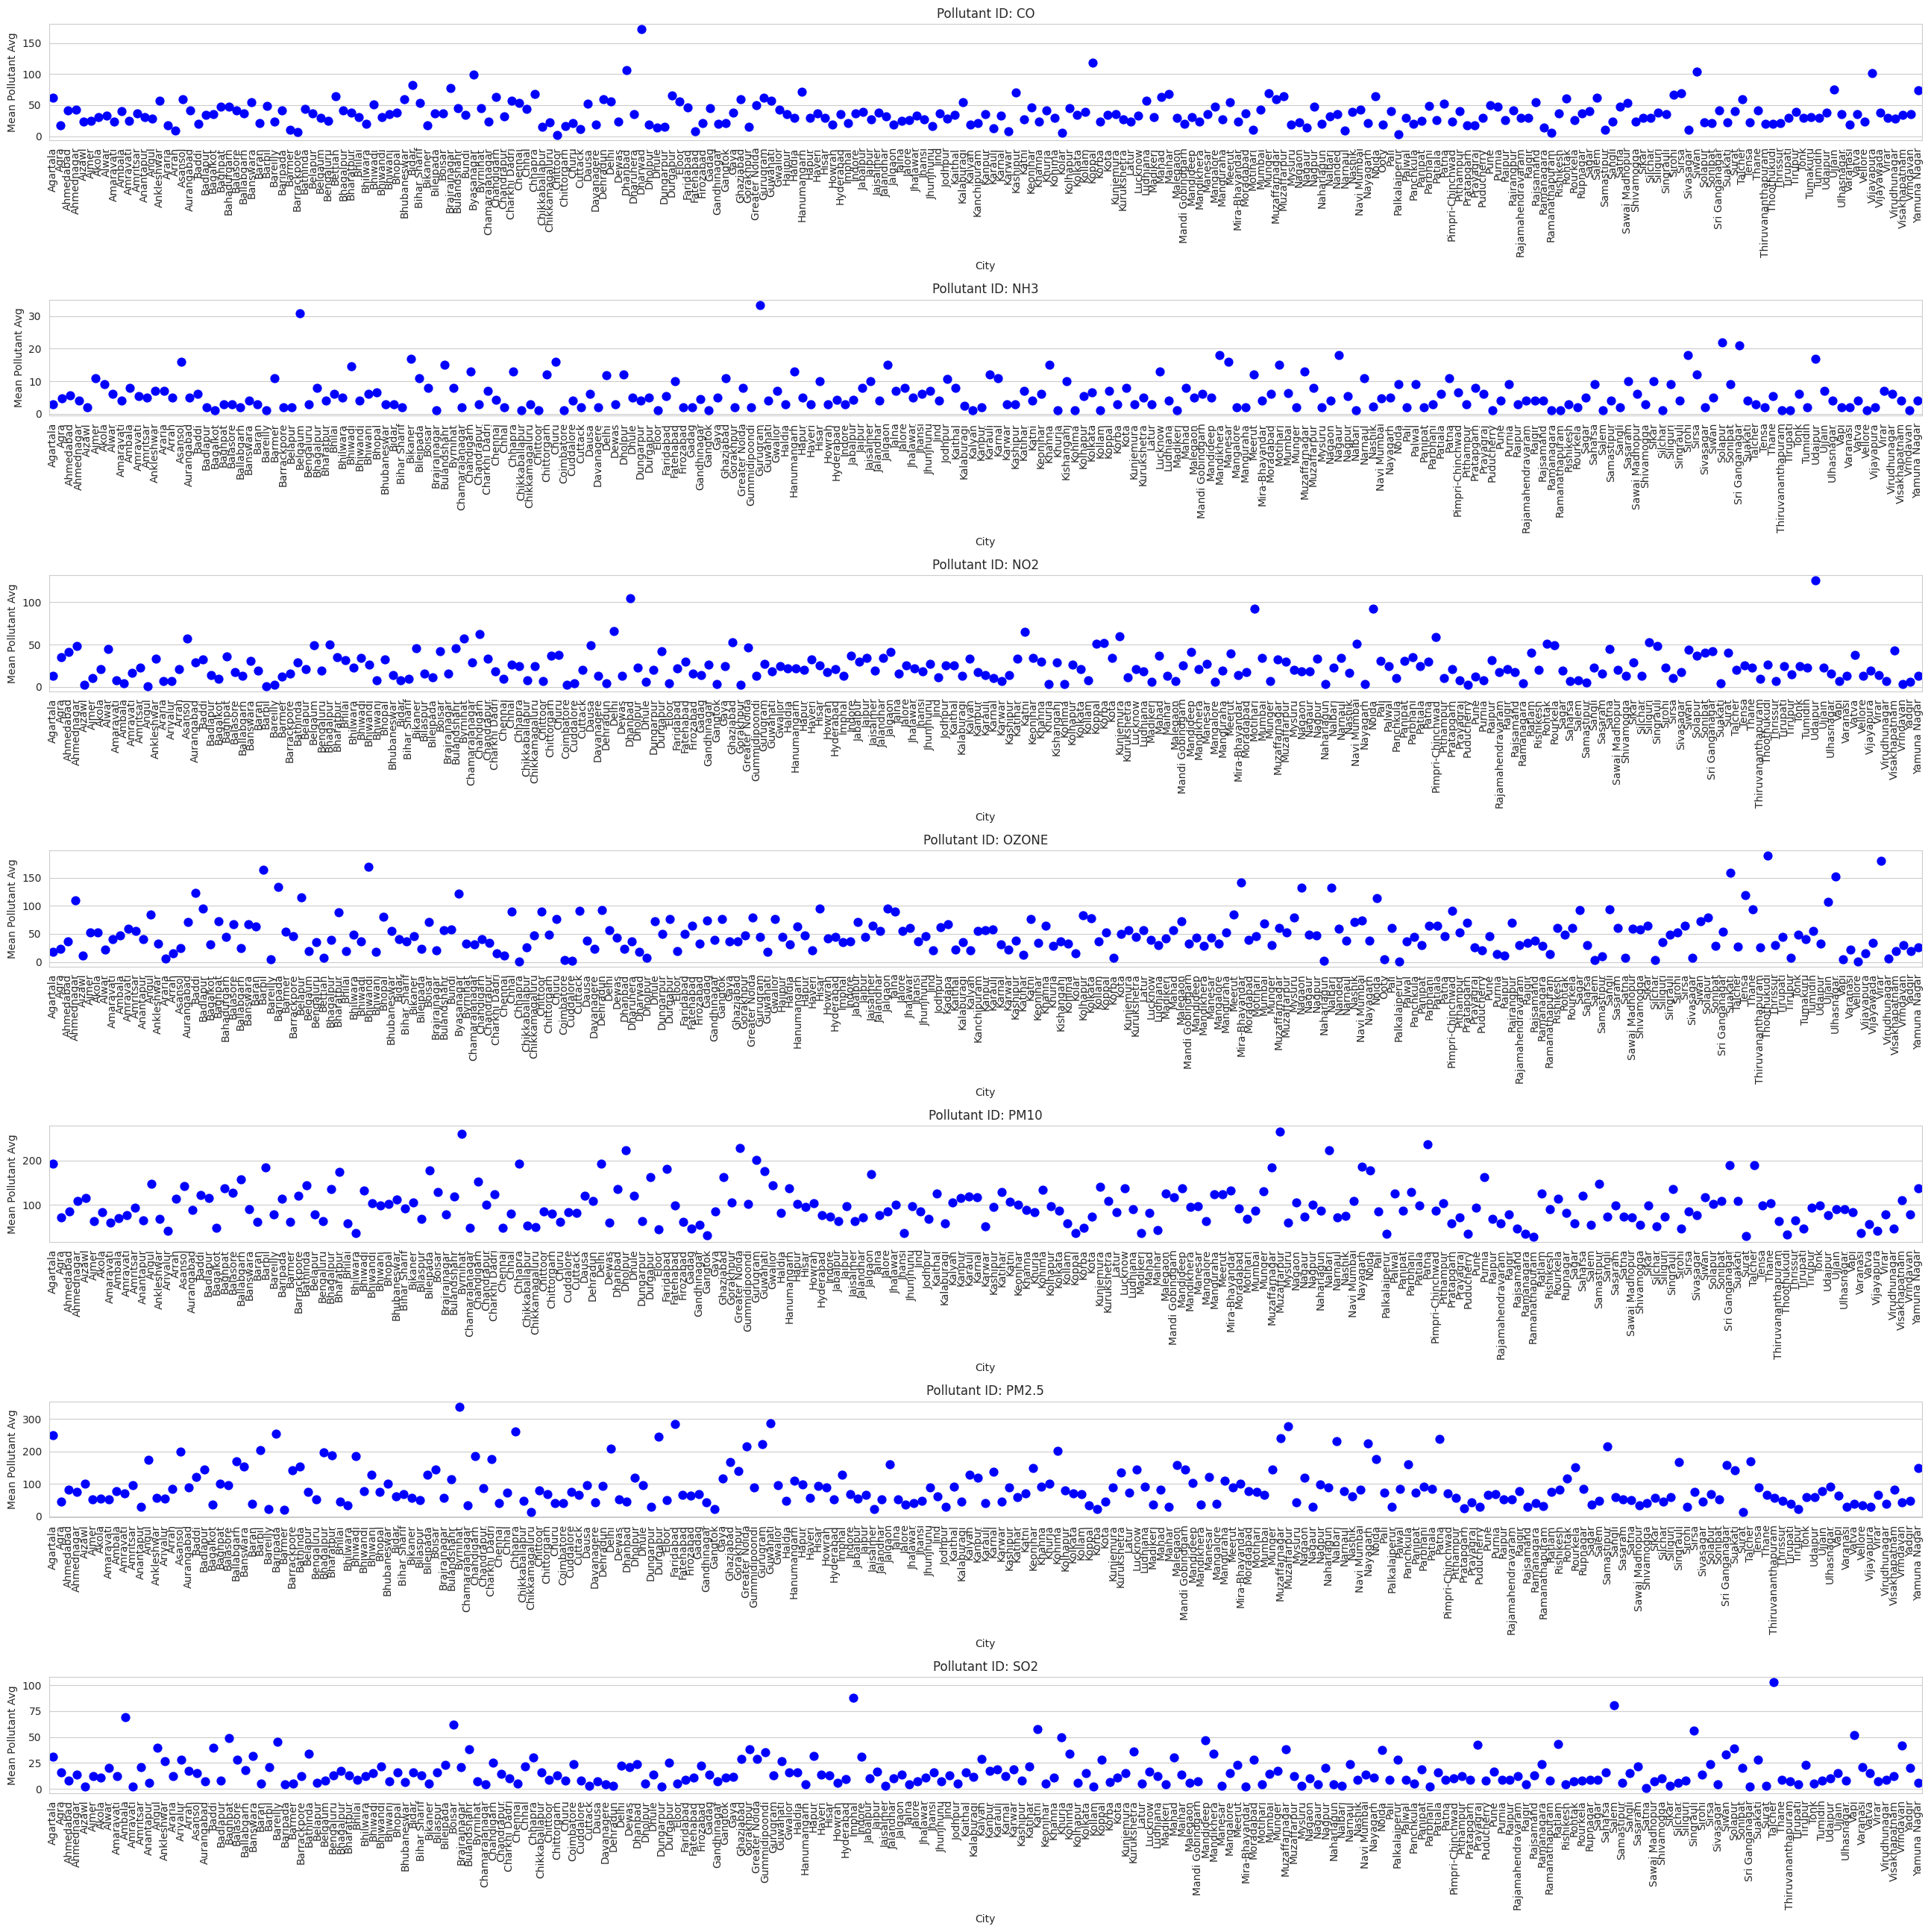

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(26, 26))

# Iterate over each pollutant_id
for i, pollutant_id in enumerate(sorted_avg_values['pollutant_id'].unique()):
    # Filter the DataFrame for the current pollutant_id
    data = sorted_avg_values[sorted_avg_values['pollutant_id'] == pollutant_id]

    # Calculate mean of pollutant_avg for each city
    data = data.groupby('city')['pollutant_avg'].mean().reset_index()

    # Plot the data
    plt.subplot(len(sorted_avg_values['pollutant_id'].unique()), 1, i+1)
    sns.pointplot(x='city', y='pollutant_avg', data=data, color='blue', join=False)
    plt.title(f'Pollutant ID: {pollutant_id}')
    plt.xlabel('City')
    plt.ylabel('Mean Pollutant Avg')
    plt.xticks(rotation=90)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


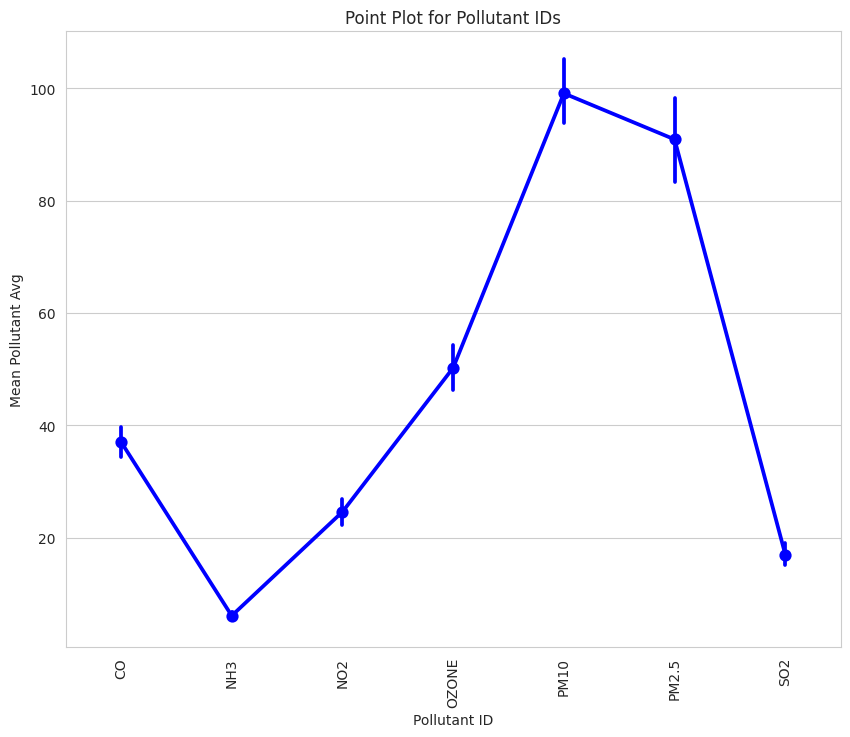

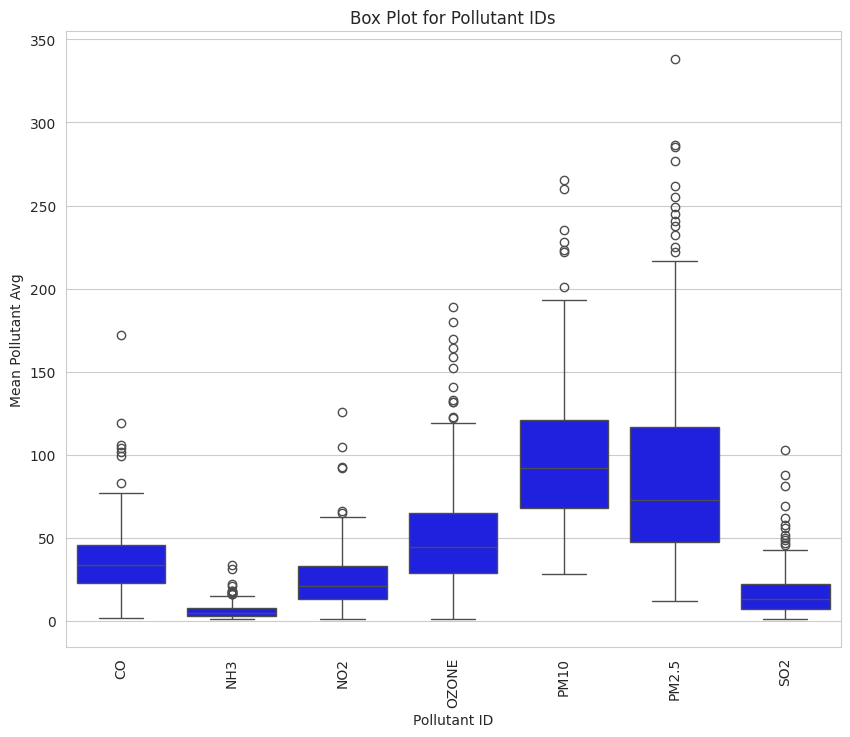

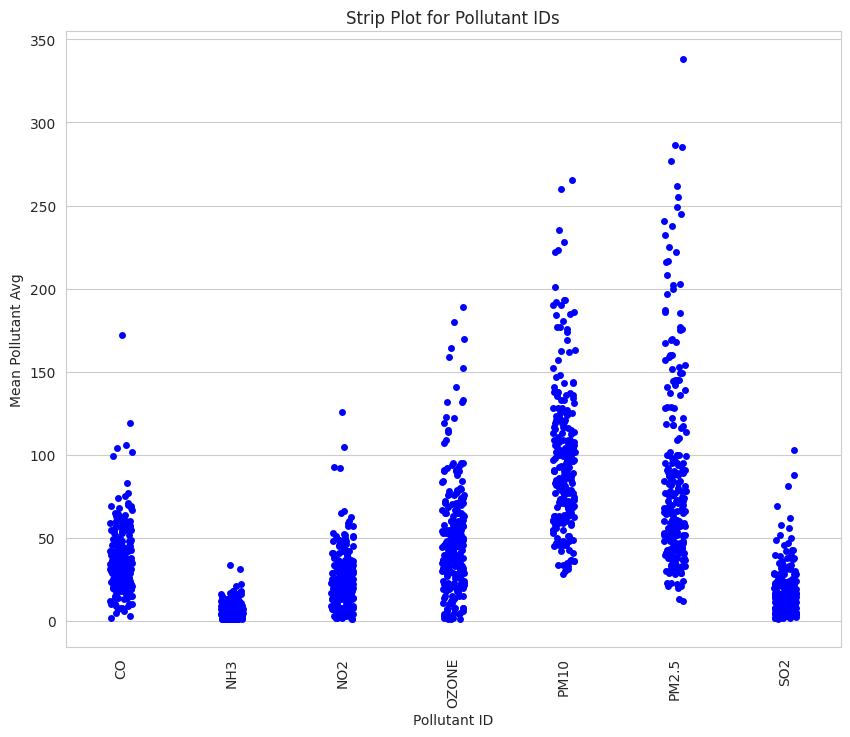

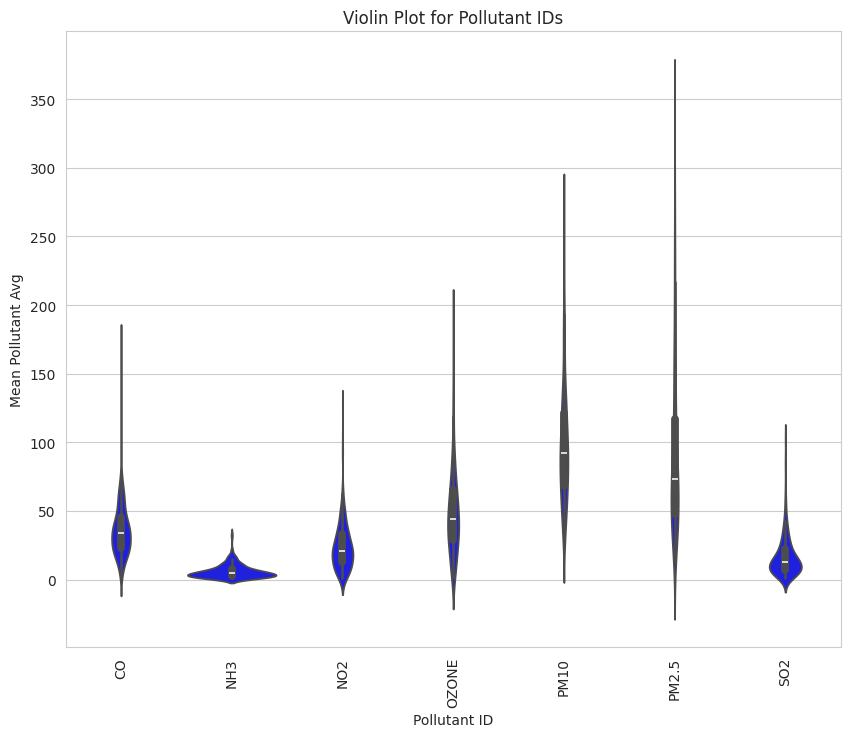

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(10, 8))

# Plot point plot
sns.pointplot(x='pollutant_id', y='pollutant_avg', data=sorted_avg_values, color='blue')
plt.title('Point Plot for Pollutant IDs')
plt.xlabel('Pollutant ID')
plt.ylabel('Mean Pollutant Avg')
plt.xticks(rotation=90)

# Show plot
plt.show()

# Plot box plot
plt.figure(figsize=(10, 8))
sns.boxplot(x='pollutant_id', y='pollutant_avg', data=sorted_avg_values, color='blue')
plt.title('Box Plot for Pollutant IDs')
plt.xlabel('Pollutant ID')
plt.ylabel('Mean Pollutant Avg')
plt.xticks(rotation=90)

# Show plot
plt.show()

# Plot strip plot
plt.figure(figsize=(10, 8))
sns.stripplot(x='pollutant_id', y='pollutant_avg', data=sorted_avg_values, color='blue')
plt.title('Strip Plot for Pollutant IDs')
plt.xlabel('Pollutant ID')
plt.ylabel('Mean Pollutant Avg')
plt.xticks(rotation=90)

# Show plot
plt.show()

# Plot violin plot
plt.figure(figsize=(10, 8))
sns.violinplot(x='pollutant_id', y='pollutant_avg', data=sorted_avg_values, color='blue')
plt.title('Violin Plot for Pollutant IDs')
plt.xlabel('Pollutant ID')
plt.ylabel('Mean Pollutant Avg')
plt.xticks(rotation=90)

# Show plot
plt.show()


In [ ]:
!pip install squarify

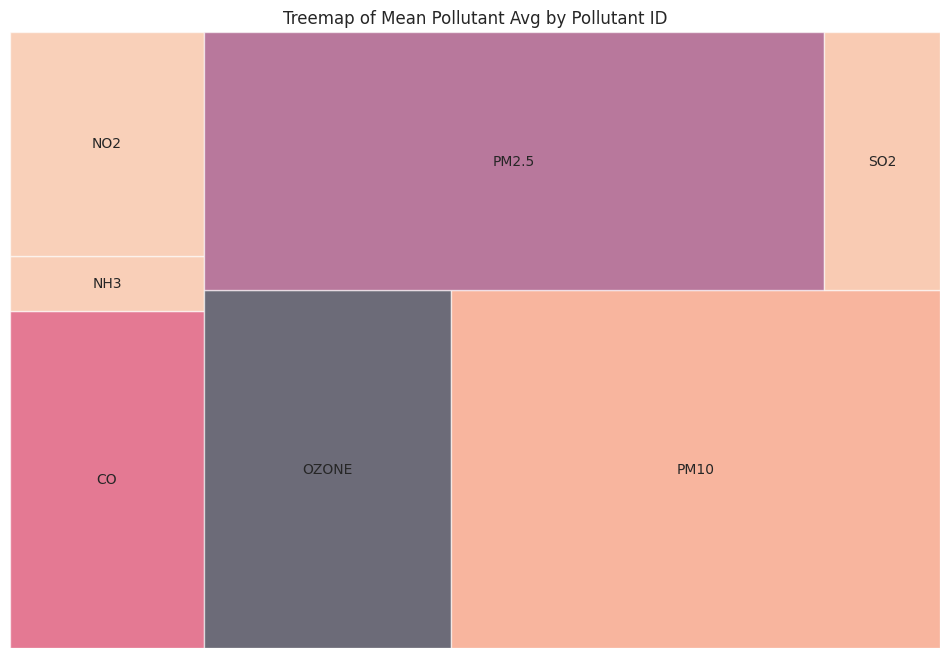

In [ ]:
import matplotlib.pyplot as plt
import squarify

# Group the data by pollutant_id and calculate the mean of pollutant_avg
grouped_data = sorted_avg_values.groupby('pollutant_id')['pollutant_avg'].mean().reset_index()

# Plotting the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=grouped_data['pollutant_avg'], label=grouped_data['pollutant_id'], alpha=0.6)
plt.axis('off')
plt.title('Treemap of Mean Pollutant Avg by Pollutant ID')
plt.show()


# Statistical Inference

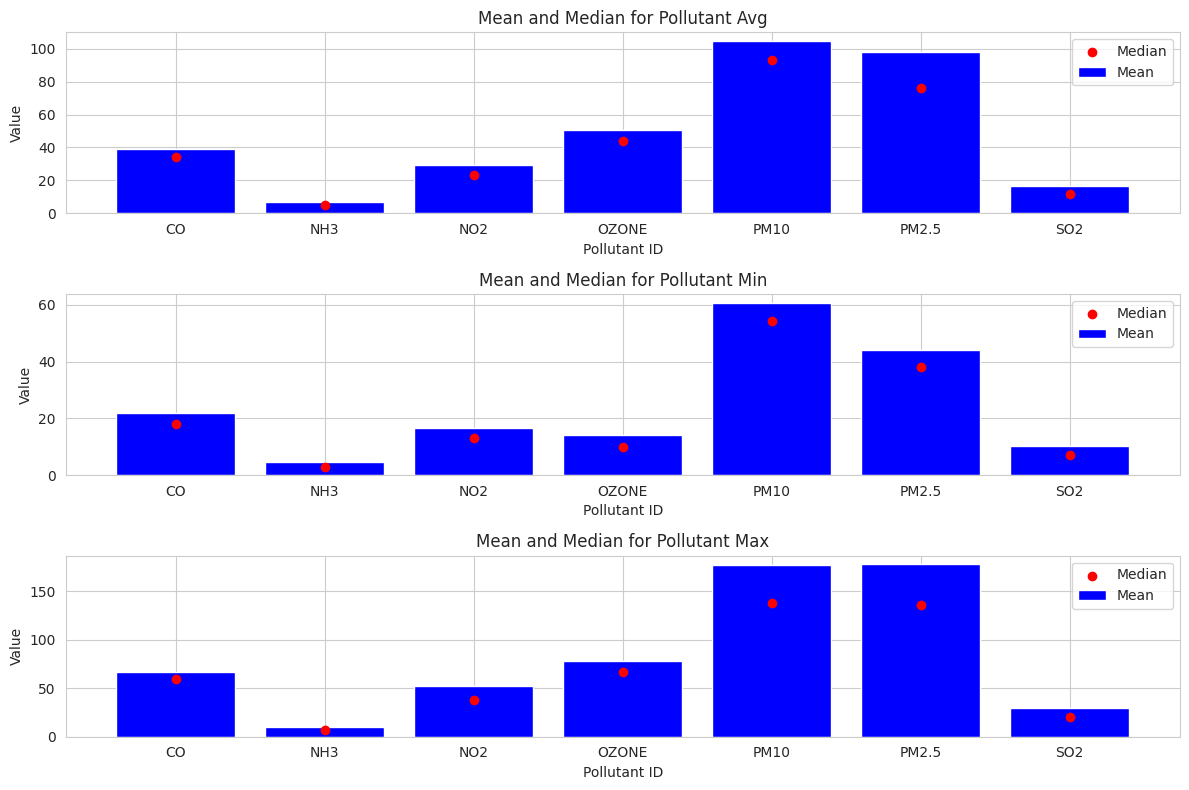

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data by pollutant_id and calculate mean and median
grouped_data = df.groupby('pollutant_id').agg({'pollutant_avg': ['mean', 'median'],
                                               'pollutant_min': ['mean', 'median'],
                                               'pollutant_max': ['mean', 'median']}).reset_index()

# Plotting
plt.figure(figsize=(12, 8))

# Plot mean and median for pollutant_avg
plt.subplot(3, 1, 1)
plt.bar(grouped_data['pollutant_id'], grouped_data[('pollutant_avg', 'mean')], color='blue', label='Mean')
plt.scatter(grouped_data['pollutant_id'], grouped_data[('pollutant_avg', 'median')], color='red', label='Median')
plt.title('Mean and Median for Pollutant Avg')
plt.xlabel('Pollutant ID')
plt.ylabel('Value')
plt.legend()

# Plot mean and median for pollutant_min
plt.subplot(3, 1, 2)
plt.bar(grouped_data['pollutant_id'], grouped_data[('pollutant_min', 'mean')], color='blue', label='Mean')
plt.scatter(grouped_data['pollutant_id'], grouped_data[('pollutant_min', 'median')], color='red', label='Median')
plt.title('Mean and Median for Pollutant Min')
plt.xlabel('Pollutant ID')
plt.ylabel('Value')
plt.legend()

# Plot mean and median for pollutant_max
plt.subplot(3, 1, 3)
plt.bar(grouped_data['pollutant_id'], grouped_data[('pollutant_max', 'mean')], color='blue', label='Mean')
plt.scatter(grouped_data['pollutant_id'], grouped_data[('pollutant_max', 'median')], color='red', label='Median')
plt.title('Mean and Median for Pollutant Max')
plt.xlabel('Pollutant ID')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()


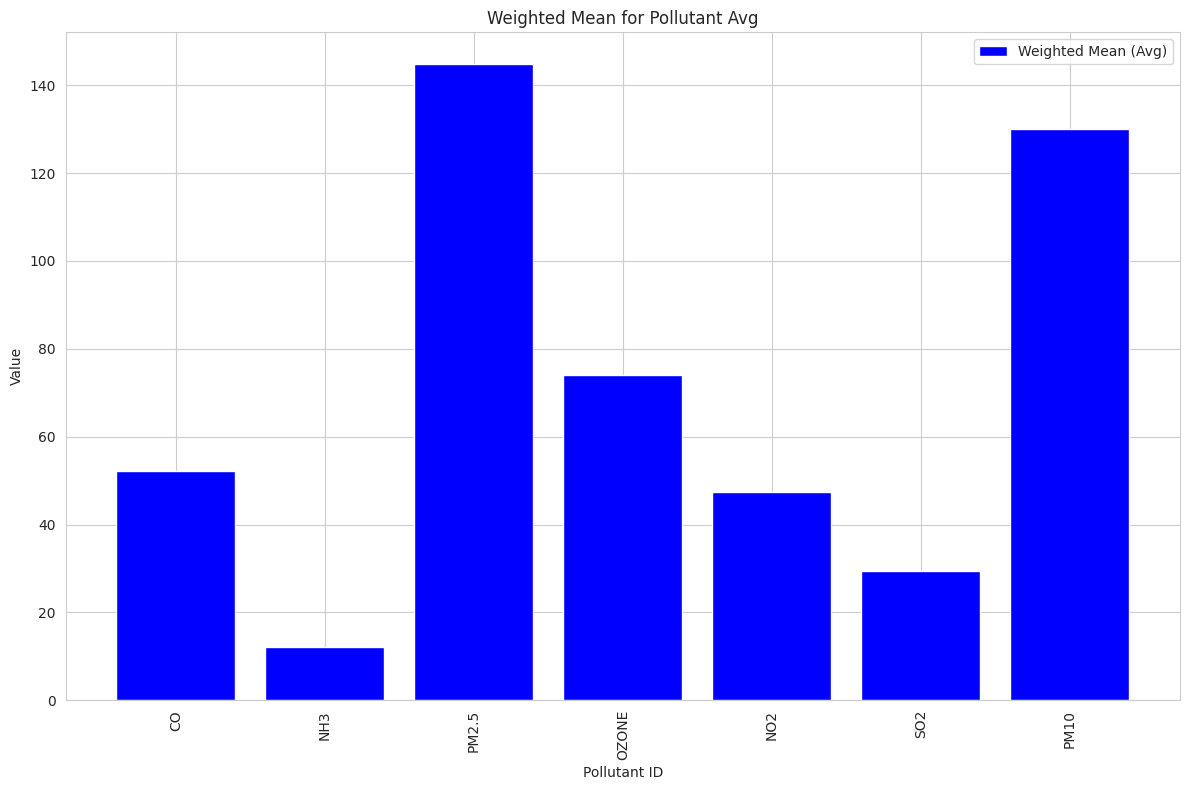

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create an empty DataFrame to store the results
weighted_means = pd.DataFrame(columns=['pollutant_id', 'weighted_avg'])

# Iterate over each pollutant_id
for pollutant_id in df['pollutant_id'].unique():
    # Filter the data for the current pollutant_id
    subset = df[df['pollutant_id'] == pollutant_id].copy()  # Copy the subset to avoid SettingWithCopyWarning

    # Calculate weights for the current pollutant_id
    subset['wt'] = subset['pollutant_avg'] / subset['pollutant_avg'].sum()

    # Calculate weighted mean for pollutant_avg
    weighted_avg = (subset['pollutant_avg'] * subset['wt']).sum() / subset['wt'].sum()

    # Append the results to the DataFrame
    weighted_means.loc[len(weighted_means)] = {'pollutant_id': pollutant_id, 'weighted_avg': weighted_avg}

# Plotting
plt.figure(figsize=(12, 8))

# Plot weighted mean for pollutant_avg
plt.bar(weighted_means['pollutant_id'], weighted_means['weighted_avg'], color='blue', label='Weighted Mean (Avg)')
plt.title('Weighted Mean for Pollutant Avg')
plt.xlabel('Pollutant ID')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


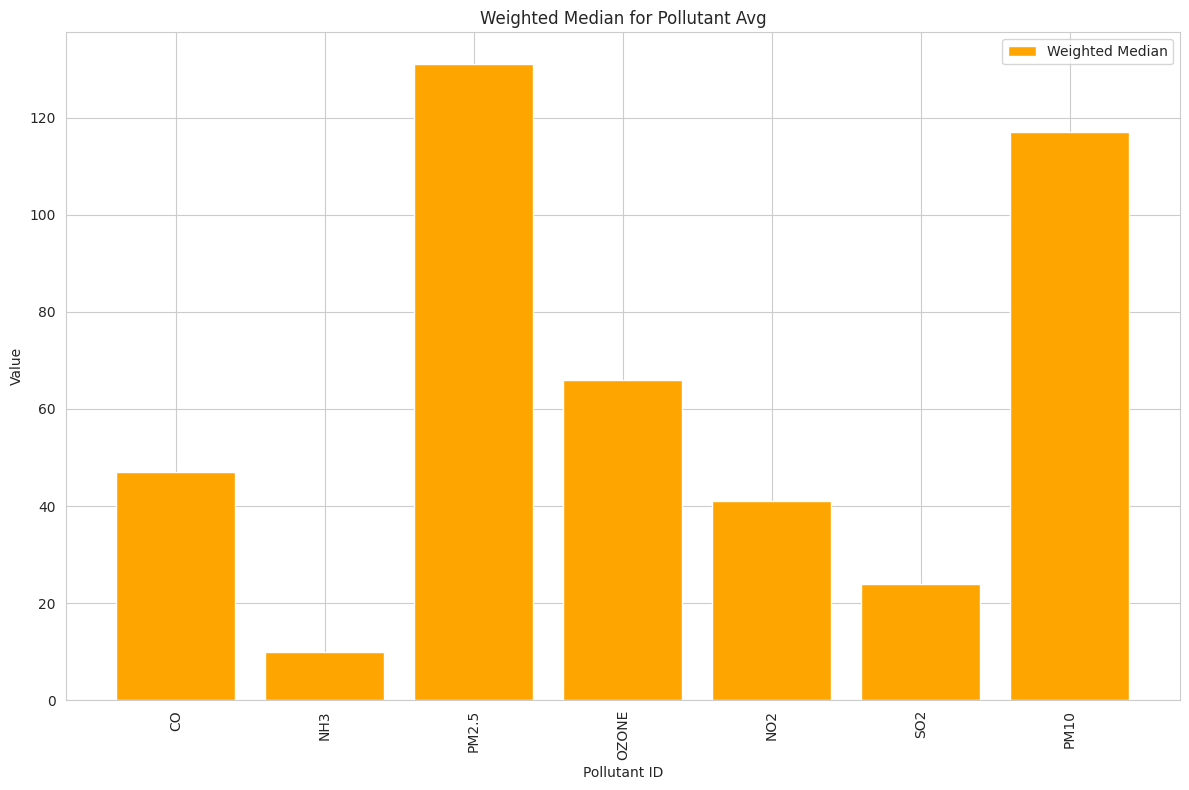

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create an empty DataFrame to store the results
weighted_medians = pd.DataFrame(columns=['pollutant_id', 'weighted_median'])

# Iterate over each pollutant_id
for pollutant_id in df['pollutant_id'].unique():
    # Filter the data for the current pollutant_id
    subset = df[df['pollutant_id'] == pollutant_id].copy()  # Copy the subset to avoid SettingWithCopyWarning

    # Calculate weights for the current pollutant_id
    subset['wt'] = subset['pollutant_avg'] / subset['pollutant_avg'].sum()

    # Step 1: Sort the data
    sorted_data = subset.sort_values(by='pollutant_avg')

    # Step 2: Calculate weighted median
    wgtsum = 0
    for idx, row in sorted_data.iterrows():
        wgtsum += row["wt"]
        if wgtsum >= 0.5:
            weighted_median = row["pollutant_avg"]
            break

    # Append the results to the DataFrame
    weighted_medians.loc[len(weighted_medians)] = {'pollutant_id': pollutant_id, 'weighted_median': weighted_median}

# Plotting
plt.figure(figsize=(12, 8))

# Plot weighted median for pollutant_avg
plt.bar(weighted_medians['pollutant_id'], weighted_medians['weighted_median'], color='orange', label='Weighted Median')
plt.title('Weighted Median for Pollutant Avg')
plt.xlabel('Pollutant ID')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


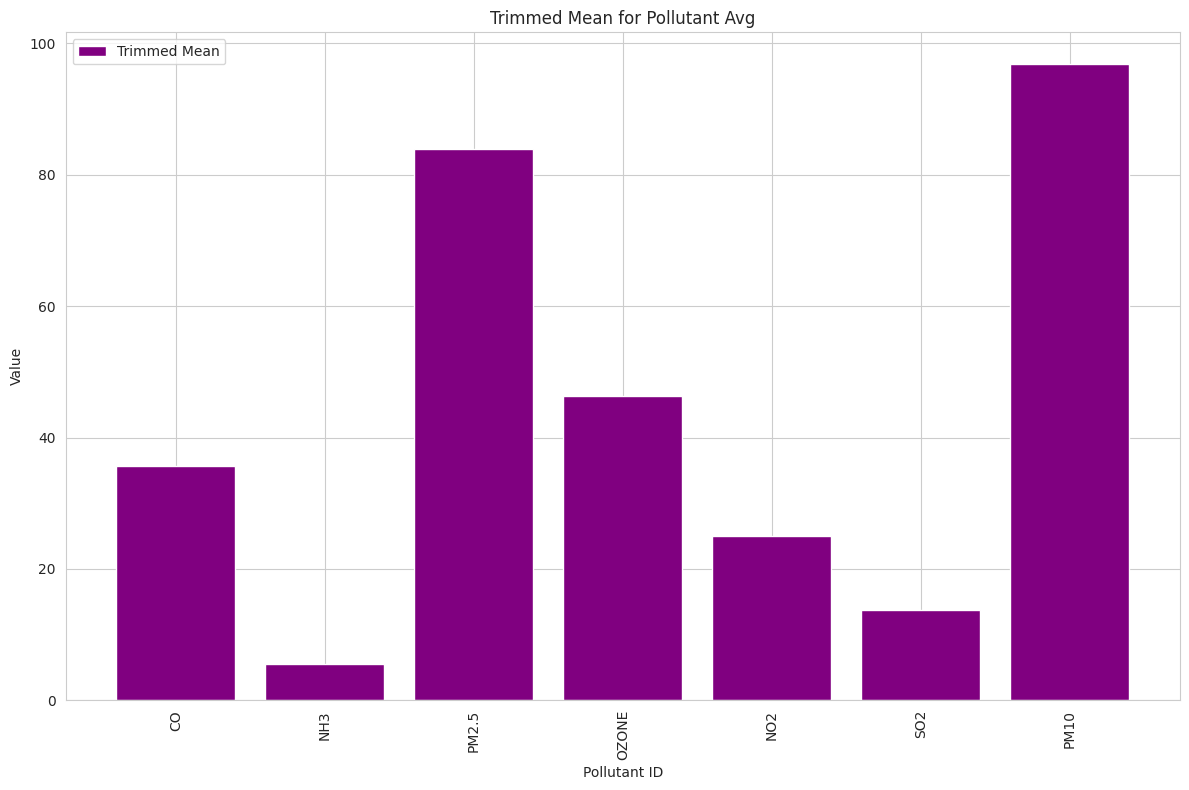

In [ ]:
from scipy import stats

# Create an empty DataFrame to store the results
trimmed_means = pd.DataFrame(columns=['pollutant_id', 'trimmed_mean'])

# Define the percentage of data to be trimmed from both ends
trim_percentage = 0.15

# Iterate over each pollutant_id
for pollutant_id in df['pollutant_id'].unique():
    # Filter the data for the current pollutant_id
    subset = df[df['pollutant_id'] == pollutant_id].copy()  # Copy the subset to avoid SettingWithCopyWarning

    # Calculate trimmed mean for pollutant_avg
    trimmed_mean = stats.trim_mean(subset['pollutant_avg'], trim_percentage)

    # Append the results to the DataFrame
    trimmed_means.loc[len(trimmed_means)] = {'pollutant_id': pollutant_id, 'trimmed_mean': trimmed_mean}

# Plotting
plt.figure(figsize=(12, 8))

# Plot trimmed mean for pollutant_avg
plt.bar(trimmed_means['pollutant_id'], trimmed_means['trimmed_mean'], color='purple', label='Trimmed Mean')
plt.title('Trimmed Mean for Pollutant Avg')
plt.xlabel('Pollutant ID')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


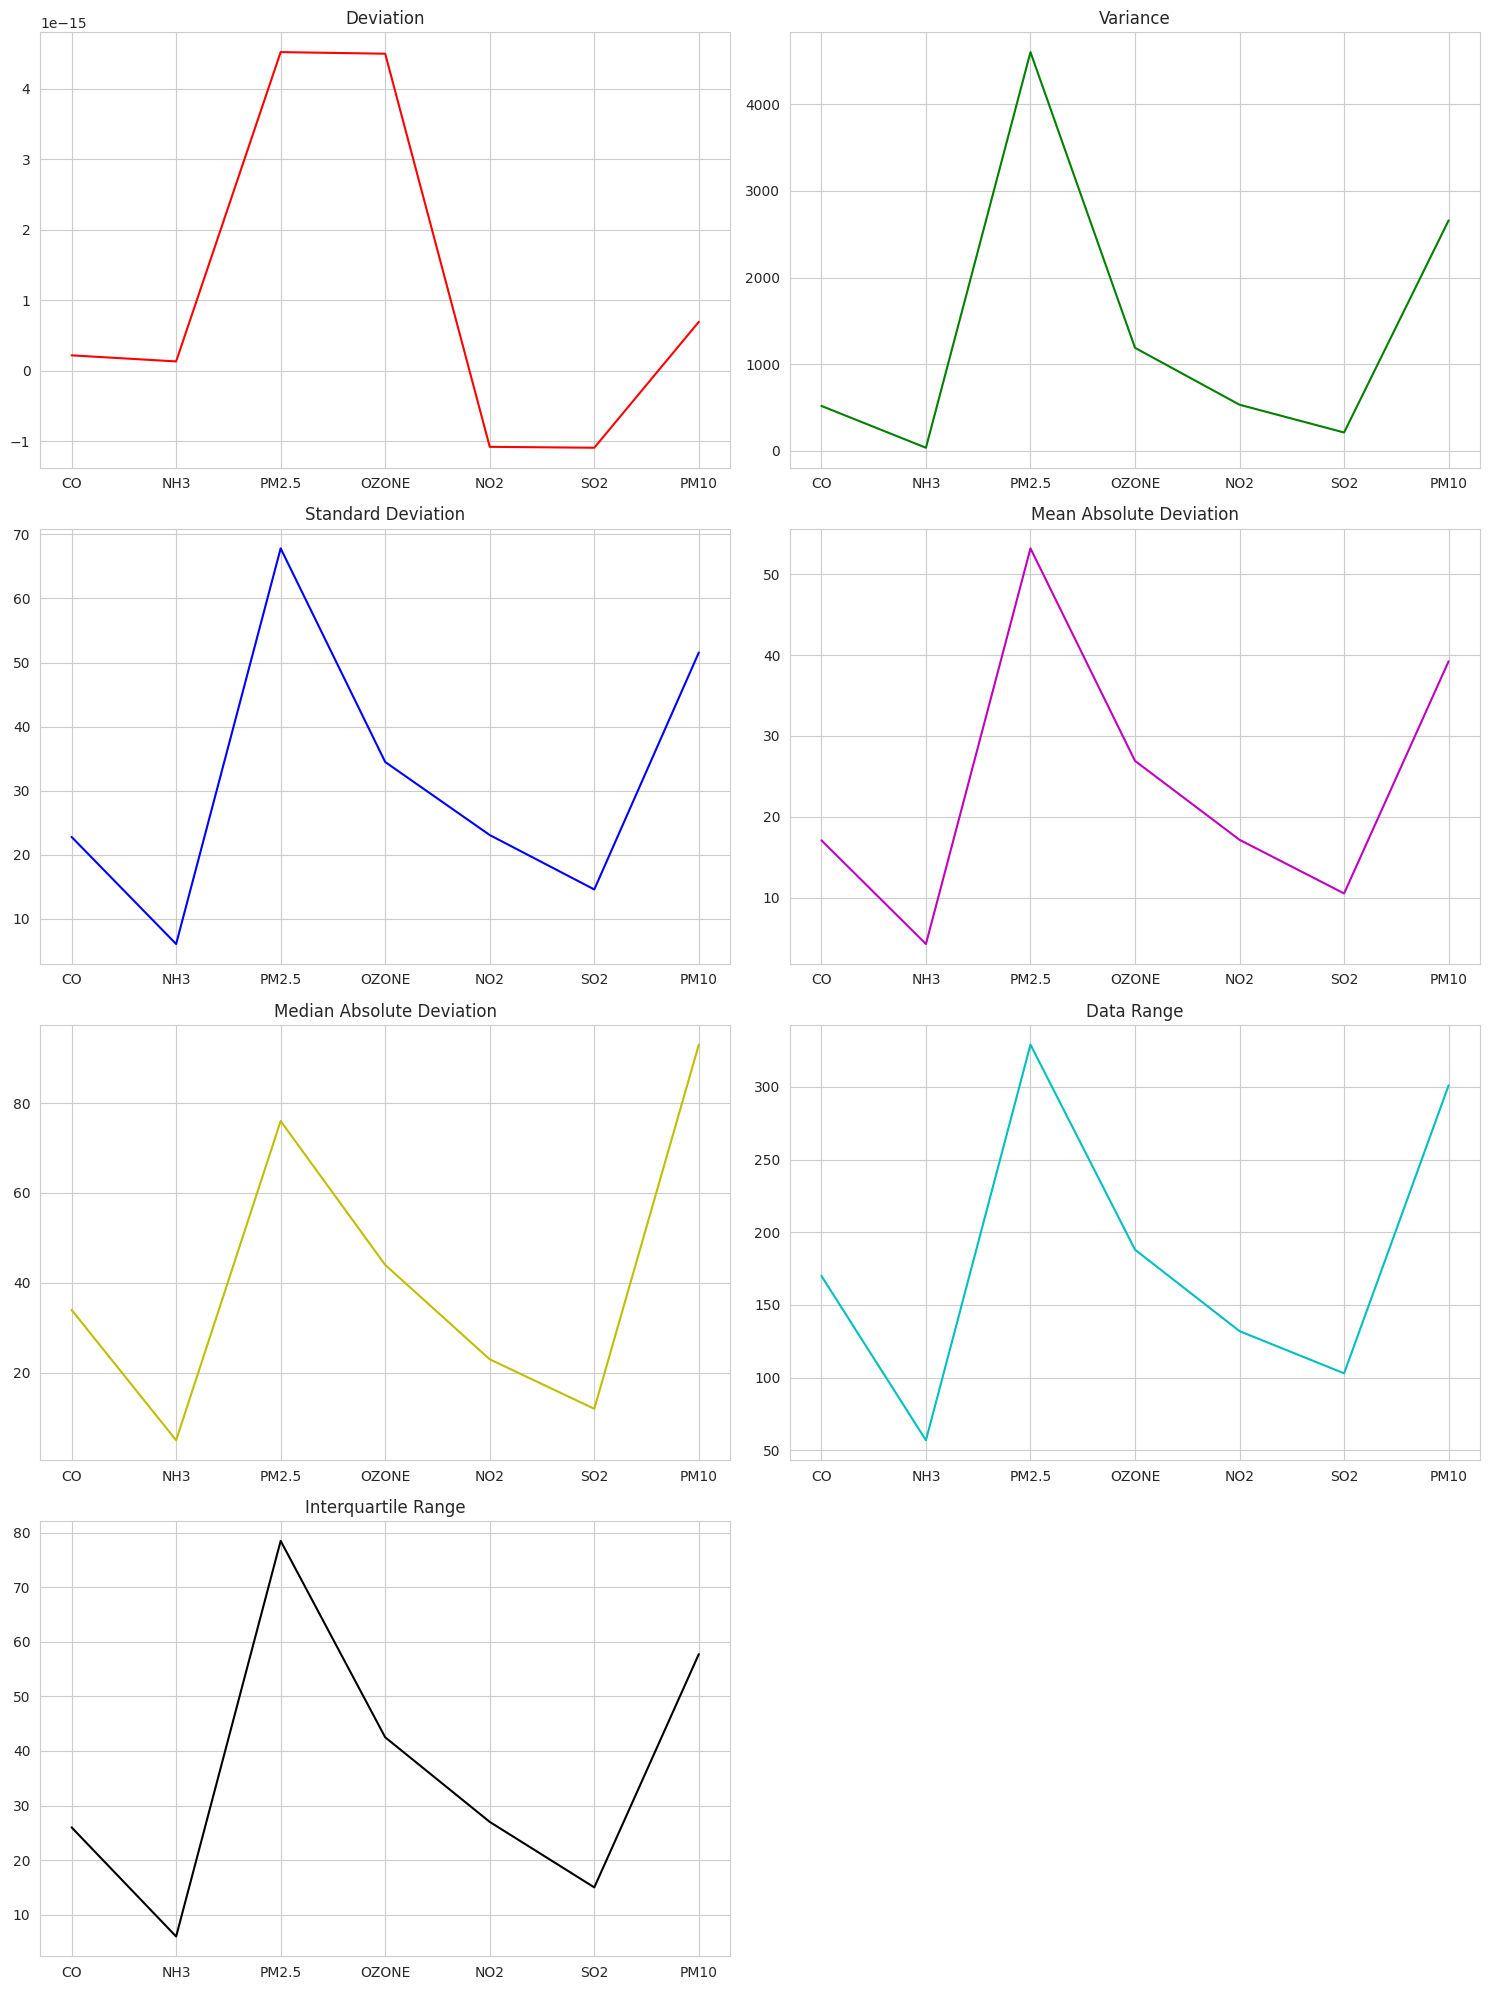

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import iqr

# Create an empty DataFrame to store the results
stats_data = pd.DataFrame(columns=['pollutant_id', 'deviation', 'variance', 'std_deviation',
                                   'mean_abs_deviation', 'median_abs_deviation', 'data_range', 'iqr'])

# Iterate over each pollutant_id
for pollutant_id in df['pollutant_id'].unique():
    # Filter the data for the current pollutant_id
    subset = df[df['pollutant_id'] == pollutant_id]

    # Calculate deviation
    deviation = subset['pollutant_avg'] - subset['pollutant_avg'].mean()

    # Calculate variance
    variance = subset['pollutant_avg'].var()

    # Calculate standard deviation
    std_deviation = subset['pollutant_avg'].std()

    # Calculate mean absolute deviation
    mean_abs_deviation = np.abs(subset['pollutant_avg'] - subset['pollutant_avg'].mean()).mean()

    # Calculate median absolute deviation from the median
    median_abs_deviation = subset['pollutant_avg'].median()

    # Calculate data range
    data_range = subset['pollutant_avg'].max() - subset['pollutant_avg'].min()

    # Calculate interquartile range
    iqr_value = iqr(subset['pollutant_avg'])

    # Append the results to the DataFrame
    stats_data.loc[len(stats_data)] = {'pollutant_id': pollutant_id, 'deviation': deviation.mean(),
                                        'variance': variance, 'std_deviation': std_deviation,
                                        'mean_abs_deviation': mean_abs_deviation,
                                        'median_abs_deviation': median_abs_deviation,
                                        'data_range': data_range, 'iqr': iqr_value}

# Plotting
fig, axs = plt.subplots(4, 2, figsize=(15, 20))

# Plot deviation
axs[0, 0].plot(stats_data['pollutant_id'], stats_data['deviation'], label='Deviation', color='r')
axs[0, 0].set_title('Deviation')

# Plot variance
axs[0, 1].plot(stats_data['pollutant_id'], stats_data['variance'], label='Variance', color='g')
axs[0, 1].set_title('Variance')

# Plot standard deviation
axs[1, 0].plot(stats_data['pollutant_id'], stats_data['std_deviation'], label='Standard Deviation', color='b')
axs[1, 0].set_title('Standard Deviation')

# Plot mean absolute deviation
axs[1, 1].plot(stats_data['pollutant_id'], stats_data['mean_abs_deviation'], label='Mean Abs Deviation', color='m')
axs[1, 1].set_title('Mean Absolute Deviation')

# Plot median absolute deviation
axs[2, 0].plot(stats_data['pollutant_id'], stats_data['median_abs_deviation'], label='Median Abs Deviation', color='y')
axs[2, 0].set_title('Median Absolute Deviation')

# Plot data range
axs[2, 1].plot(stats_data['pollutant_id'], stats_data['data_range'], label='Data Range', color='c')
axs[2, 1].set_title('Data Range')

# Plot interquartile range
axs[3, 0].plot(stats_data['pollutant_id'], stats_data['iqr'], label='Interquartile Range', color='k')
axs[3, 0].set_title('Interquartile Range')

# Remove empty subplot
fig.delaxes(axs[3, 1])

plt.tight_layout()
plt.show()


# Sampling

<ipython-input-65-ddcc673a352a>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  systematic_sample['pollutant_id_encoded'] = systematic_sample['pollutant_id'].map(pollutant_id_mapping)


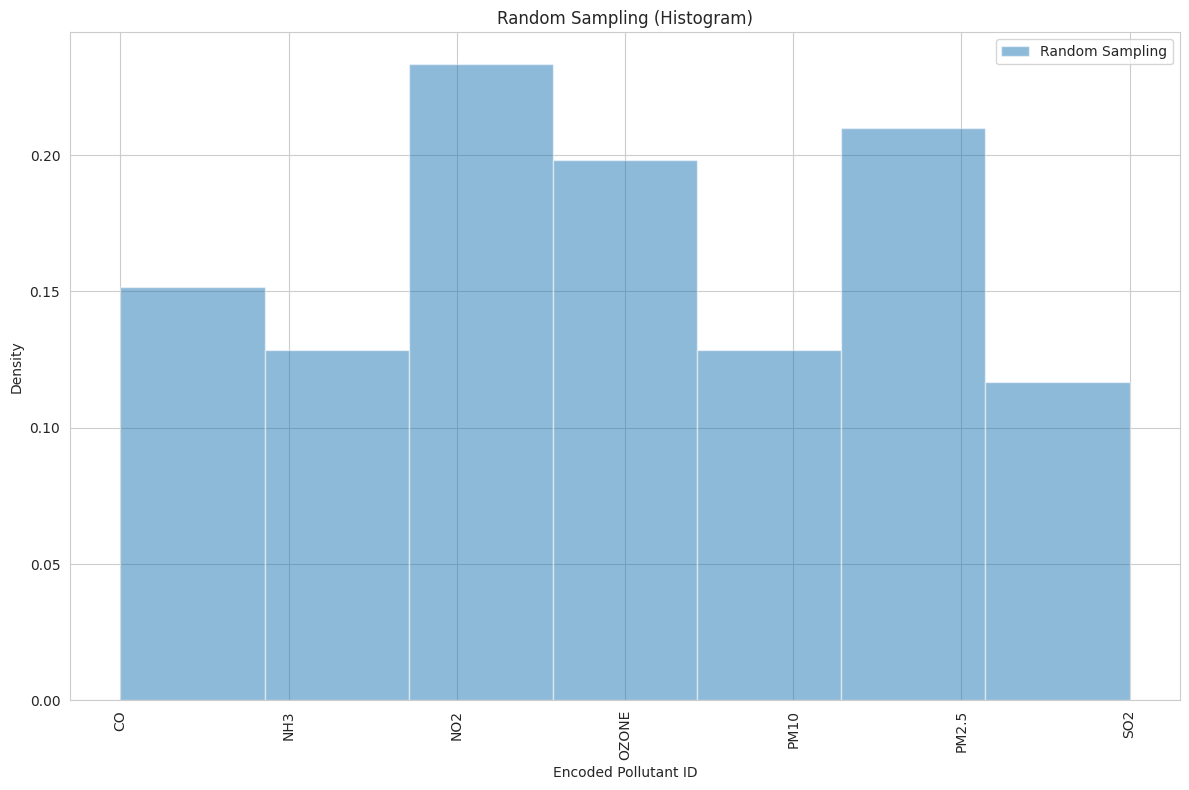

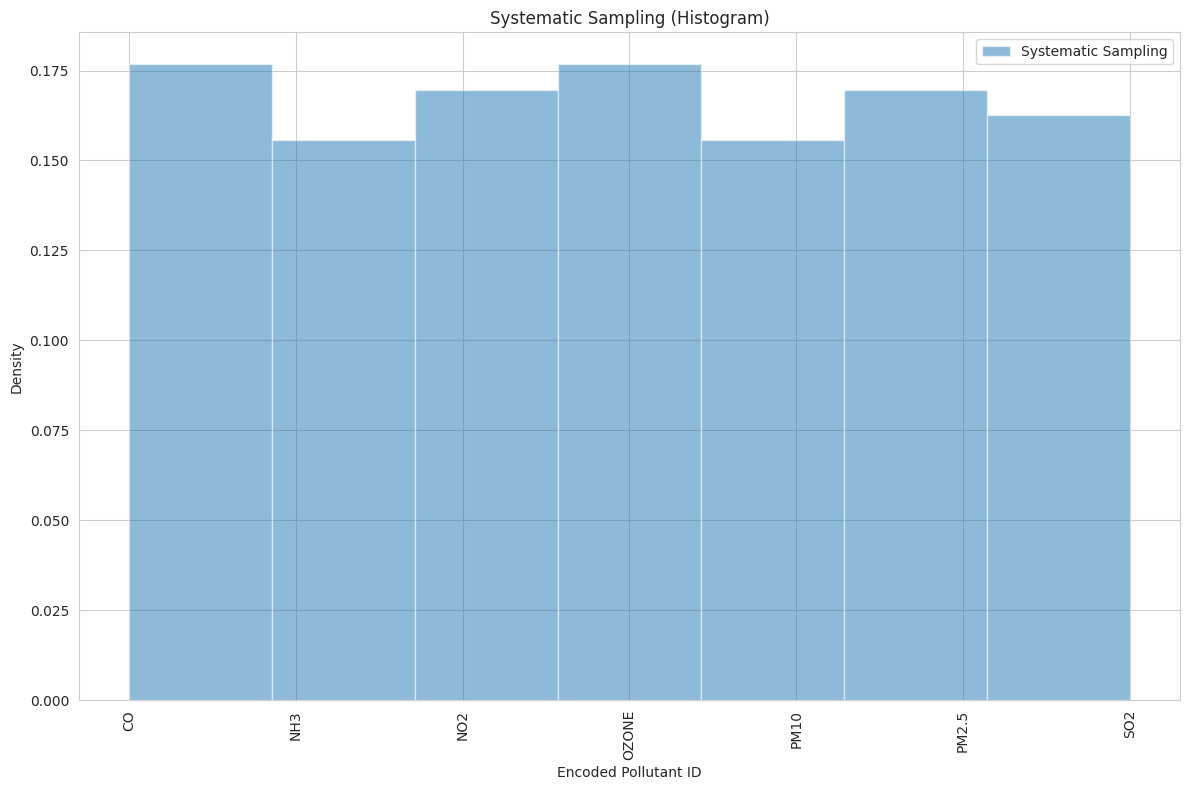

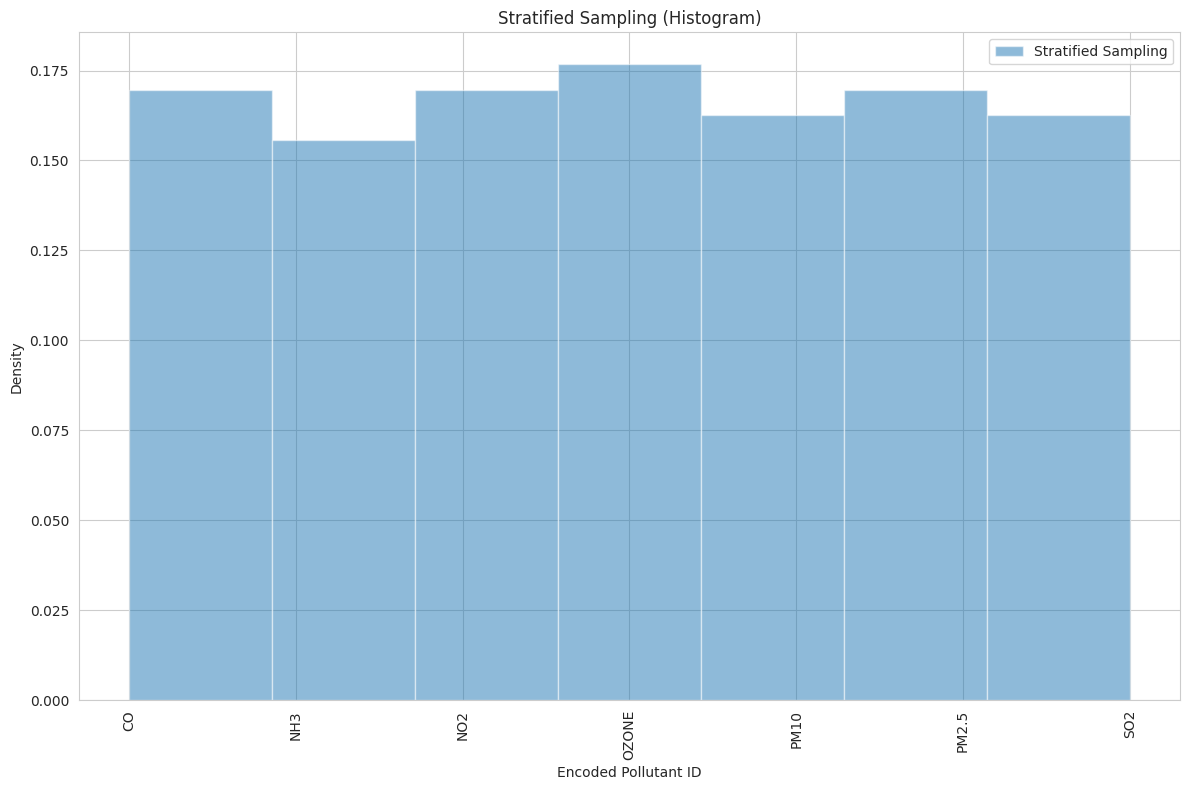

In [ ]:
# Convert pollutant_avg to numeric (if it's not already)
df['pollutant_avg'] = pd.to_numeric(df['pollutant_avg'], errors='coerce')

# Drop rows with NaN in pollutant_avg column
df.dropna(subset=['pollutant_avg'], inplace=True)

# Group by pollutant_id and city, then calculate the mean of pollutant_avg
grouped = df.groupby(['pollutant_id', 'city'])['pollutant_avg'].mean().reset_index()

# Random Sampling
random_sample = grouped.sample(n=100)  # Change the sample size as needed

# Systematic Sampling
k = 10  # Sampling interval
systematic_sample = grouped.iloc[::k]

# Stratified Sampling
stratified_sample = grouped.groupby('pollutant_id').apply(lambda x: x.sample(frac=0.1))  # Adjust frac as needed

# Convert pollutant_id to numeric values
pollutant_id_mapping = {val: i for i, val in enumerate(grouped['pollutant_id'].unique())}
grouped['pollutant_id_encoded'] = grouped['pollutant_id'].map(pollutant_id_mapping)
random_sample['pollutant_id_encoded'] = random_sample['pollutant_id'].map(pollutant_id_mapping)
systematic_sample['pollutant_id_encoded'] = systematic_sample['pollutant_id'].map(pollutant_id_mapping)
stratified_sample['pollutant_id_encoded'] = stratified_sample['pollutant_id'].map(pollutant_id_mapping)

# Plotting histograms for Random Sampling
plt.figure(figsize=(12, 8))
plt.hist(random_sample['pollutant_id_encoded'], bins=len(pollutant_id_mapping), alpha=0.5, label='Random Sampling', density=True)
plt.xlabel('Encoded Pollutant ID')
plt.ylabel('Density')
plt.title('Random Sampling (Histogram)')
plt.xticks(np.arange(len(pollutant_id_mapping)), list(pollutant_id_mapping.keys()), rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting histograms for Systematic Sampling
plt.figure(figsize=(12, 8))
plt.hist(systematic_sample['pollutant_id_encoded'], bins=len(pollutant_id_mapping), alpha=0.5, label='Systematic Sampling', density=True)
plt.xlabel('Encoded Pollutant ID')
plt.ylabel('Density')
plt.title('Systematic Sampling (Histogram)')
plt.xticks(np.arange(len(pollutant_id_mapping)), list(pollutant_id_mapping.keys()), rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting histograms for Stratified Sampling
plt.figure(figsize=(12, 8))
plt.hist(stratified_sample['pollutant_id_encoded'], bins=len(pollutant_id_mapping), alpha=0.5, label='Stratified Sampling', density=True)
plt.xlabel('Encoded Pollutant ID')
plt.ylabel('Density')
plt.title('Stratified Sampling (Histogram)')
plt.xticks(np.arange(len(pollutant_id_mapping)), list(pollutant_id_mapping.keys()), rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


# Sampling Mean

<ipython-input-40-b4eeff313d5e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm25_data['pollutant_avg'] = pd.to_numeric(pm25_data['pollutant_avg'], errors='coerce')
<ipython-input-40-b4eeff313d5e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm25_data.dropna(subset=['pollutant_avg'], inplace=True)


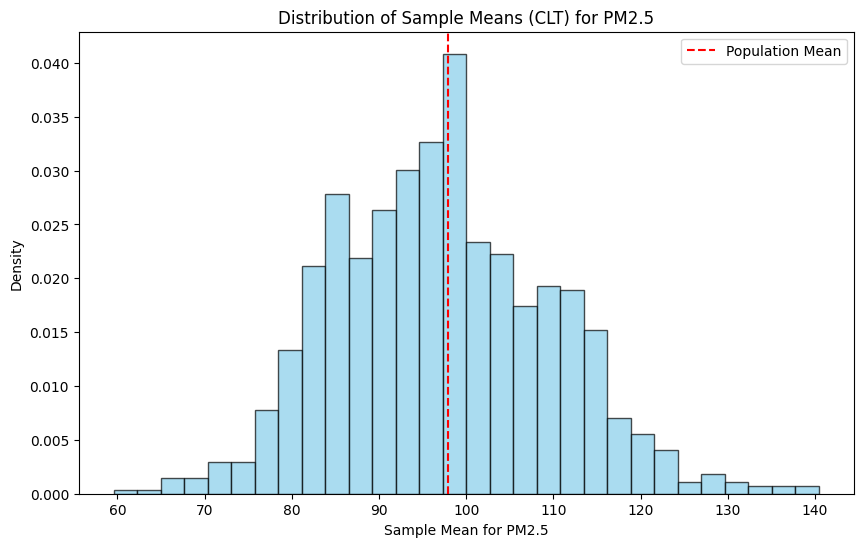

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for 'PM2.5' pollutant_id
pm25_data = df[df['pollutant_id'] == 'PM2.5']
pm25_data['pollutant_avg'] = pd.to_numeric(pm25_data['pollutant_avg'], errors='coerce')
pm25_data.dropna(subset=['pollutant_avg'], inplace=True)

# Calculate population mean and standard deviation for 'PM2.5'
population_mean_pm25 = pm25_data['pollutant_avg'].mean()
population_std_pm25 = pm25_data['pollutant_avg'].std()

# Number of samples to draw
num_samples = 1000
# Sample size
sample_size = 30

# Initialize an array to store sample means
sample_means_pm25 = np.zeros(num_samples)

# Simulate sampling from the dataset for 'PM2.5'
for i in range(num_samples):
    sample_pm25 = np.random.choice(pm25_data['pollutant_avg'], size=sample_size, replace=False)
    sample_means_pm25[i] = np.mean(sample_pm25)

# Plotting the distribution of sample means for 'PM2.5'
plt.figure(figsize=(10, 6))
plt.hist(sample_means_pm25, bins=30, density=True, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Sample Mean for PM2.5')
plt.ylabel('Density')
plt.title('Distribution of Sample Means (CLT) for PM2.5')
plt.axvline(population_mean_pm25, color='red', linestyle='--', label='Population Mean')
plt.legend()
plt.show()


# Bootstrap sampling and Confidence interval

<ipython-input-41-832e855000e6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm25_data['pollutant_avg'] = pd.to_numeric(pm25_data['pollutant_avg'], errors='coerce')
<ipython-input-41-832e855000e6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm25_data.dropna(subset=['pollutant_avg'], inplace=True)


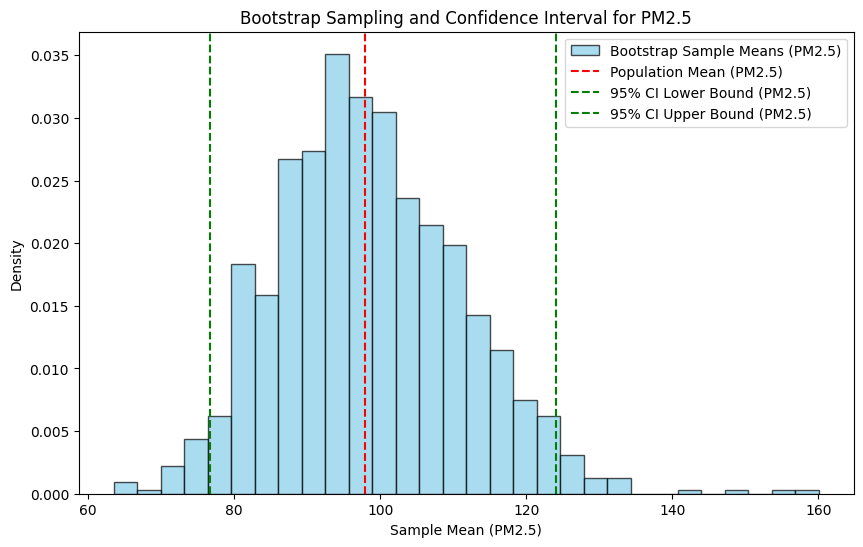

PM2.5 Data:
Population Mean: 97.91807228915663
Standard Error: 3.3290169490448247
95% Confidence Interval: [ 76.68333333 124.03583333]


In [ ]:
from scipy.stats import sem

# Filter data for 'PM2.5' pollutant_id
pm25_data = df[df['pollutant_id'] == 'PM2.5']
pm25_data['pollutant_avg'] = pd.to_numeric(pm25_data['pollutant_avg'], errors='coerce')
pm25_data.dropna(subset=['pollutant_avg'], inplace=True)

# Calculate the population mean and standard deviation for 'PM2.5'
population_mean_pm25 = pm25_data['pollutant_avg'].mean()
population_std_pm25 = pm25_data['pollutant_avg'].std()

# Number of bootstrap samples
num_bootstrap_samples = 1000
# Sample size
sample_size = 30

# Initialize an array to store bootstrap sample means
bootstrap_sample_means_pm25 = np.zeros(num_bootstrap_samples)

# Perform bootstrap sampling for 'PM2.5'
for i in range(num_bootstrap_samples):
    bootstrap_sample_pm25 = np.random.choice(pm25_data['pollutant_avg'], size=sample_size, replace=True)
    bootstrap_sample_means_pm25[i] = np.mean(bootstrap_sample_pm25)

# Calculate standard error for 'PM2.5'
standard_error_pm25 = sem(pm25_data['pollutant_avg'])

# Calculate confidence interval (assuming 95% confidence level) for 'PM2.5'
confidence_interval_pm25 = np.percentile(bootstrap_sample_means_pm25, [2.5, 97.5])

# Plotting for 'PM2.5'
plt.figure(figsize=(10, 6))

# Histogram of bootstrap sample means for 'PM2.5'
plt.hist(bootstrap_sample_means_pm25, bins=30, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Bootstrap Sample Means (PM2.5)')

# Vertical lines for population mean and confidence interval for 'PM2.5'
plt.axvline(population_mean_pm25, color='red', linestyle='--', label='Population Mean (PM2.5)')
plt.axvline(confidence_interval_pm25[0], color='green', linestyle='--', label='95% CI Lower Bound (PM2.5)')
plt.axvline(confidence_interval_pm25[1], color='green', linestyle='--', label='95% CI Upper Bound (PM2.5)')

plt.xlabel('Sample Mean (PM2.5)')
plt.ylabel('Density')
plt.title('Bootstrap Sampling and Confidence Interval for PM2.5')
plt.legend()
plt.show()

# Print results for 'PM2.5'
print("PM2.5 Data:")
print(f"Population Mean: {population_mean_pm25}")
print(f"Standard Error: {standard_error_pm25}")
print(f"95% Confidence Interval: {confidence_interval_pm25}")


# t-test

In [ ]:
# Assuming df is your DataFrame with pollutant data
pollutant_ids_mumbai = df[df['city'] == 'Mumbai']['pollutant_id'].unique()
pollutant_ids_delhi = df[df['city'] == 'Delhi']['pollutant_id'].unique()

# Print the pollutant IDs for Mumbai and Delhi
print("Pollutant IDs in Mumbai:", pollutant_ids_mumbai)
print("Pollutant IDs in Delhi:", pollutant_ids_delhi)


Pollutant IDs in Mumbai: ['OZONE' 'CO' 'PM10' 'NO2' 'NH3' 'PM2.5' 'SO2']
Pollutant IDs in Delhi: ['CO' 'NH3' 'NO2' 'SO2' 'PM10' 'OZONE' 'PM2.5']


In [ ]:
from scipy.stats import ttest_ind

def perform_t_test(df, city1, city2, pollutant_id):
    # Filter data for the two cities and the specified pollutant ID
    city1_data = df[(df['city'] == city1) & (df['pollutant_id'] == pollutant_id)]['pollutant_avg']
    city2_data = df[(df['city'] == city2) & (df['pollutant_id'] == pollutant_id)]['pollutant_avg']

    # Perform independent samples t-test
    t_stat, p_val = ttest_ind(city1_data, city2_data, equal_var=False)  # Assuming unequal variances

    # Print the results
    print("Independent Samples t-test Results for", pollutant_id, "between", city1, "and", city2)
    print("t-statistic:", t_stat)
    print("p-value:", p_val)

    # Interpret the results
    if p_val < 0.05:
        print("Reject the null hypothesis: There is a significant difference between the means.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference between the means.")




In [ ]:
perform_t_test(df, 'Mumbai', 'Delhi', 'PM2.5')

Independent Samples t-test Results for PM2.5 between Mumbai and Delhi
t-statistic: -15.636239710714644
p-value: 6.806187062249379e-19
Reject the null hypothesis: There is a significant difference between the means.


In [ ]:
perform_t_test(df, 'Gurugram', 'Delhi', 'PM2.5')

Independent Samples t-test Results for PM2.5 between Gurugram and Delhi
t-statistic: 0.27669667721551994
p-value: 0.8068190153692401
Fail to reject the null hypothesis: There is no significant difference between the means.


In [ ]:
perform_t_test(df, 'Patna', 'Delhi', 'PM2.5')

Independent Samples t-test Results for PM2.5 between Patna and Delhi
t-statistic: 2.150384100755265
p-value: 0.05405057908637756
Fail to reject the null hypothesis: There is no significant difference between the means.
